===========================

Next, clustering and cell type annotation.

In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [3]:
my_gset_lib  <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [4]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/aixh5cdaizxc5nz86k562mkqzxhpnss8-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [5]:
.libPaths(new = my_gset_lib, include.site = FALSE)

In [6]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [8]:
# my custom plotting configurations:

my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm")) 

my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [9]:
library(magrittr)

In [10]:
zheng_et_al_seurat <- 
    readRDS(here::here('r_objects', 'zheg_et_al_seurat_filtered.RDS'))

In [11]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58051 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [12]:
# custom function to pull slots:

pull_slot <- function(.data, slot_name) {
  slot(.data, rlang::as_string(rlang::ensym(slot_name)))
}

In [13]:
library(magrittr)

In [14]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% head()

orig.ident    nCount_RNA nFeature_RNA
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ SeuratProject 1438        933        
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ SeuratProject 1603        983        
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ SeuratProject 2384       1298        
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ SeuratProject 2906       1309        
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ SeuratProject 2928       1164        
AAACCTGCAACACGCC-1-GSM5319988_sham2_ SeuratProject 2153       1175        
                                     _index                              
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGCTAGCA-1-GSM5319988_sham2_
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGAGTTTAGGA-1-GSM5319988_sham2_
AAACCTGCAACACGCC-1-GSM5319988_sham2_ AAACCTGCAACACGCC-1-GSM5319988_sham2_
                                     sample            n_genes_by_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ GSM5319988_sham2_  933             
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ GSM5319988_sham2_  983             
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1298             
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1309             
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1164             
AAACCTGCAACACGCC-1-GSM5319988_sham2_ GSM5319988_sham2_ 1175             
                                     log1p_n_genes_by_counts total_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 6.839476                1438        
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 6.891626                1603        
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 7.169350                2384        
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 7.177782                2906        
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 7.060476                2928        
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 7.069874                2153        
                                     log1p_total_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 7.271704          
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 7.380256          
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 7.776955          
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 7.974877          
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 7.982416          
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 7.675082          
                                     pct_counts_in_top_50_genes ...
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 25.03477                   ...
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 27.57330                   ...
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 27.68456                   ...
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 30.17894                   ...
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 36.74863                   ...
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 29.95820                   ...
                                     log10GenesPerUMI percent_top50
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.9405030        25.03477     
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.9337334        27.57330     
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0.9218218        27.68456     
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0.8999924        30.17894     
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.8844339        36.74863     
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0.9210913        29.95820     
                                     percent_oxphos percent_apop
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 3.477051       1.808067    
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 4.117280       2.620087    
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 3.859060       2.348993    
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 1.961459       2.821748    
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 2.459016       1.741803    
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 3.483511       2.461681    
                                     percent_dna_repair percent_ieg
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.9735744          2.016690   
AAACCTGAGCTAACAA-1-GSM5319988_

In [15]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% colnames() %>% print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "status"                      "_scvi_batch"                
[19] "_scvi_labels"                "percent_mito"               
[21] "percent_ribo"                "percent_mito_ribo"          
[23] "log10GenesPerUMI"            "percent_top50"              
[25] "percent_oxphos"              "percent_apop"               
[27] "percent_dna_repair"          "percent_ieg"                
[29] "percent_hemo"                "S.Score"                    
[31] "G2M.Score"         

In [16]:
zheng_et_al_seurat$predicted_doublet %>% table()

.
FALSE  TRUE 
56192  1859 

In [17]:
options(repr.plot.width = 15, repr.plot.height = 7)

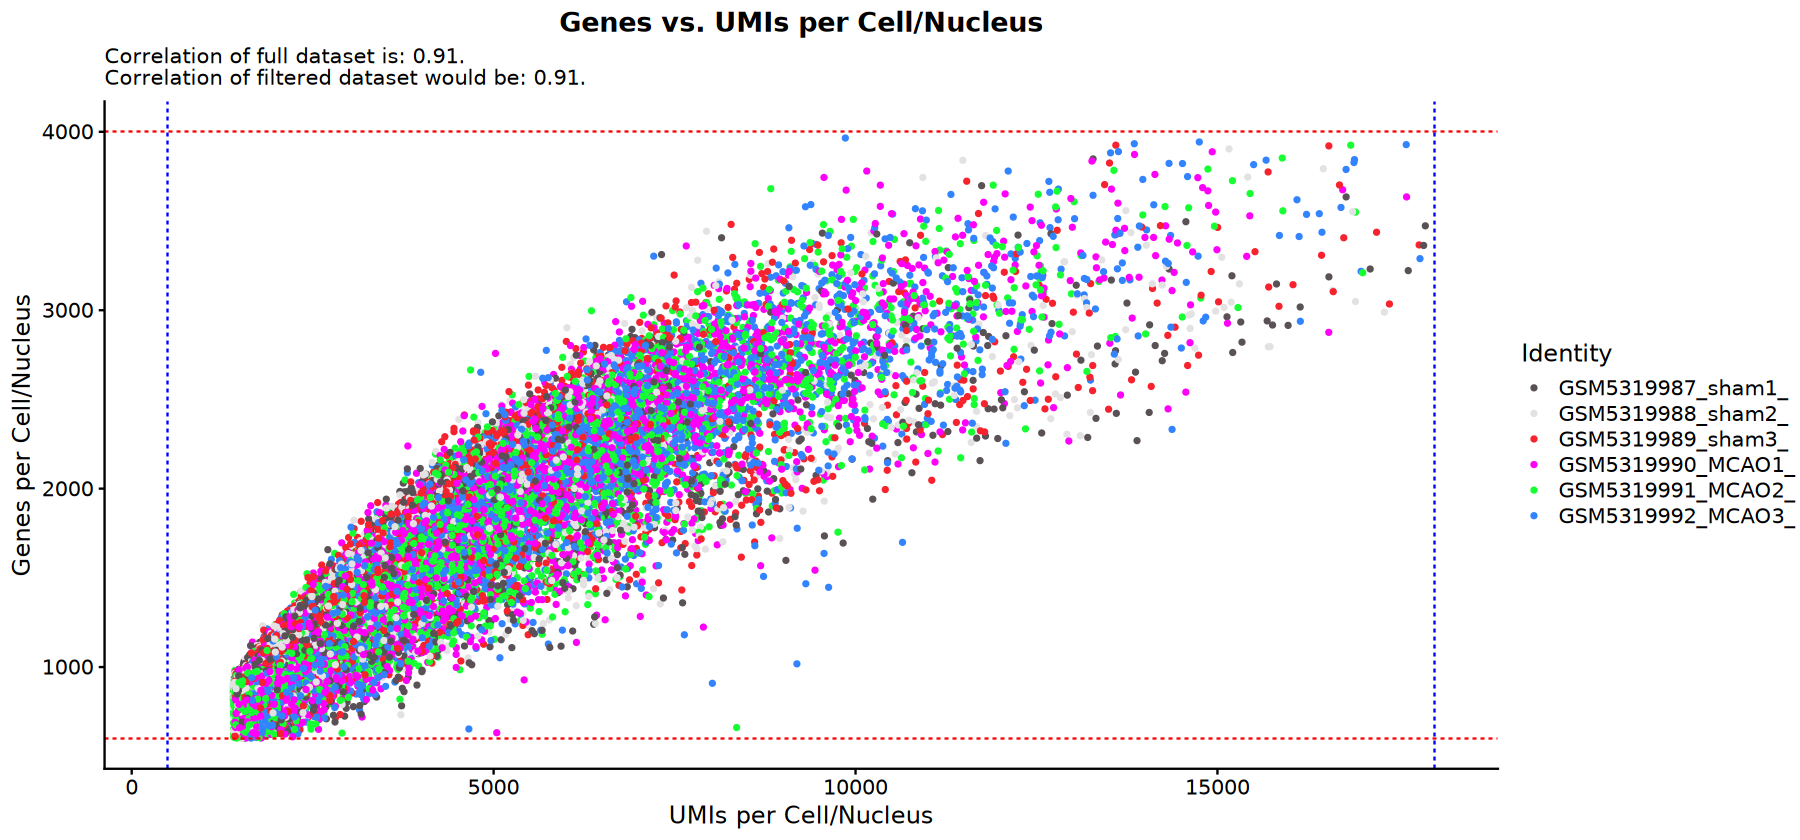

In [18]:
scCustomize::QC_Plot_UMIvsGene(seurat_object = zheng_et_al_seurat, 
                               group.by = 'sample',
                               low_cutoff_gene = 600, 
                               high_cutoff_gene = 4000, 
                               low_cutoff_UMI = 500,
                               high_cutoff_UMI = 18000)

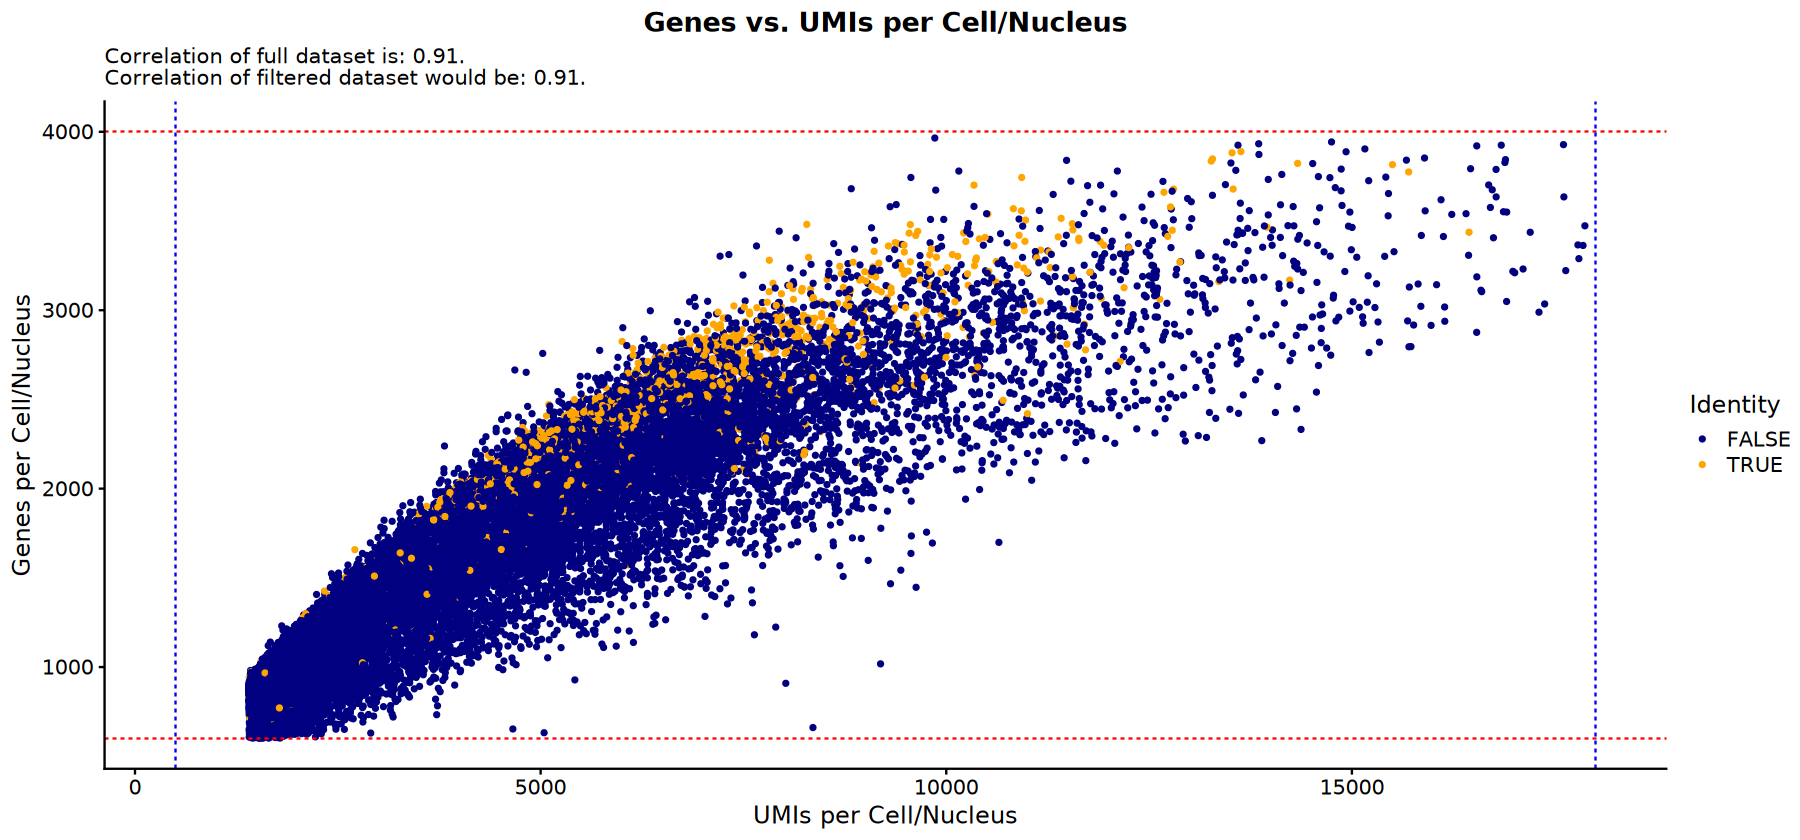

In [19]:
scCustomize::QC_Plot_UMIvsGene(seurat_object = zheng_et_al_seurat, 
                               group.by = 'predicted_doublet',
                               low_cutoff_gene = 600, 
                               high_cutoff_gene = 4000, 
                               low_cutoff_UMI = 500,
                               high_cutoff_UMI = 18000)

In [20]:
zheng_et_al_seurat %>% pull_slot(meta.data) %>% with(table(sample, predicted_doublet))

                   predicted_doublet
sample              FALSE  TRUE
  GSM5319987_sham1_  8487   239
  GSM5319988_sham2_  8205   291
  GSM5319989_sham3_  9624   299
  GSM5319990_MCAO1_ 11264   369
  GSM5319991_MCAO2_ 10794   438
  GSM5319992_MCAO3_  7818   223

In [21]:
library(ggplot2)

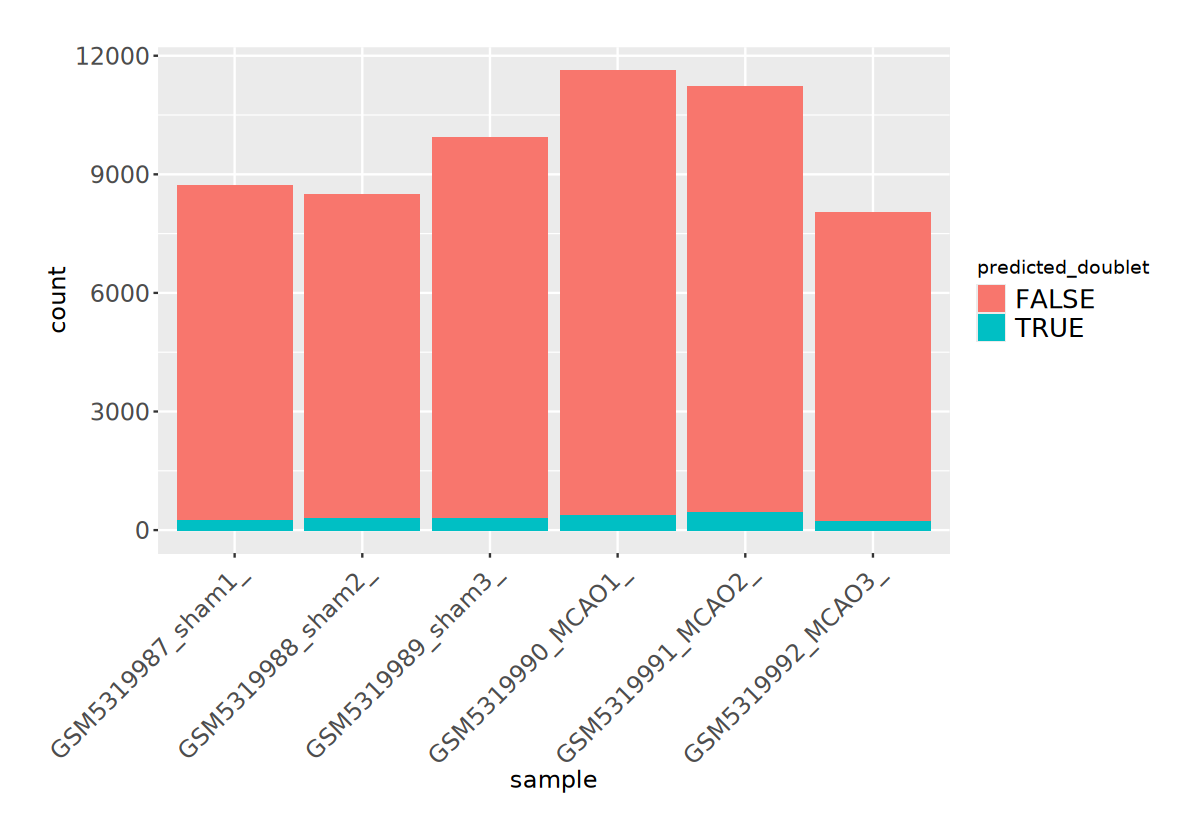

In [22]:
options(repr.plot.width = 10, repr.plot.height = 7)

zheng_et_al_seurat %>% 
pull_slot(meta.data) %>% 
ggplot(aes(sample, fill = predicted_doublet)) +
geom_bar() +
my_theme +
my_margin

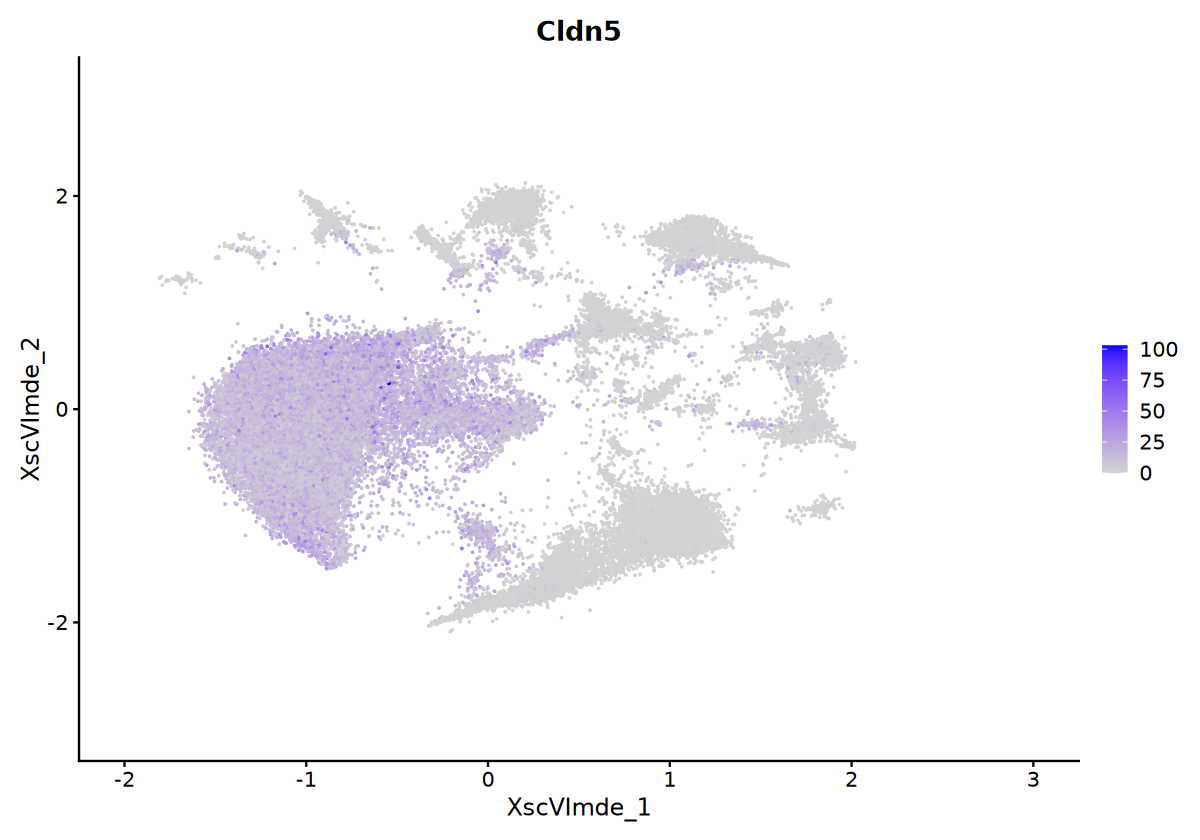

In [23]:
FeaturePlot(object = zheng_et_al_seurat,  slot = 'counts', features = 'Cldn5' ,reduction = 'XscVImde_')

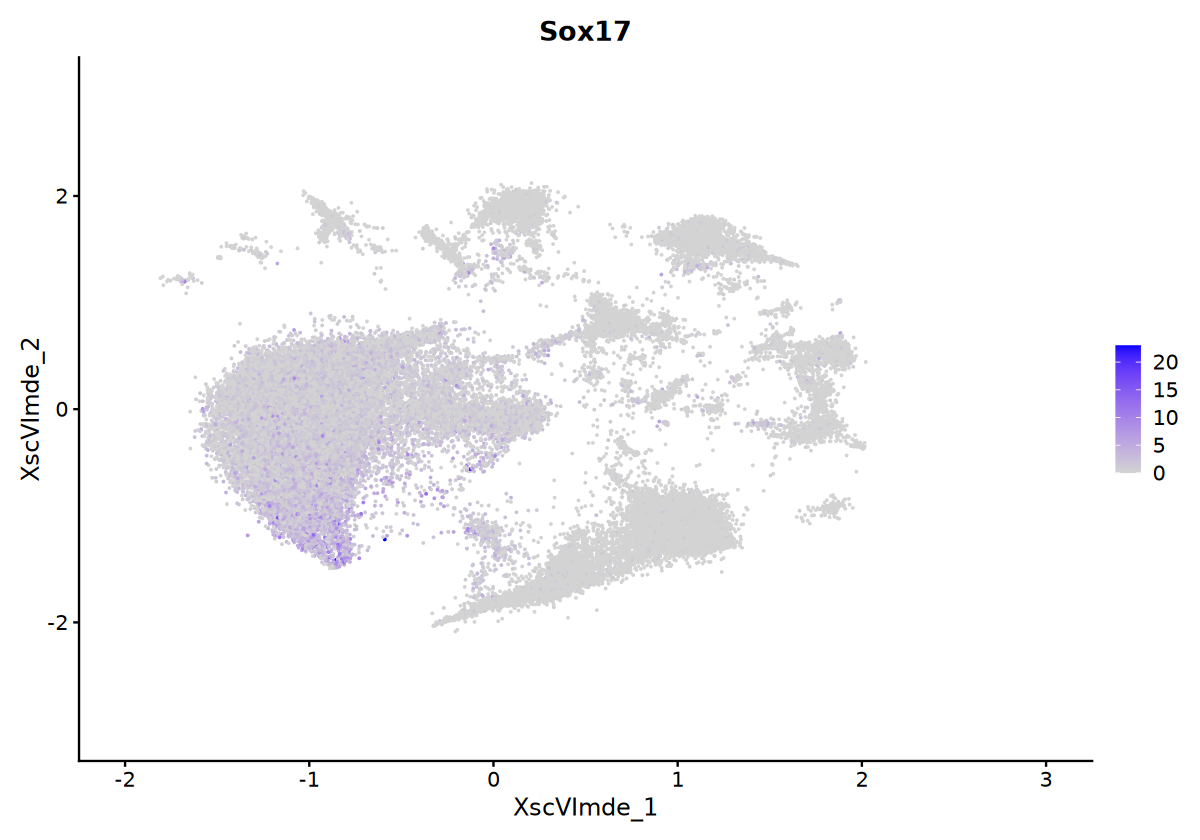

In [24]:
FeaturePlot(object = zheng_et_al_seurat,  slot = 'counts', features = 'Sox17' ,reduction = 'XscVImde_')

In [25]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58051 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [26]:
# filter doublets:

In [27]:
zheng_et_al_seurat$predicted_doublet %>% table()

.
FALSE  TRUE 
56192  1859 

In [28]:
zheng_et_al_filtered <- 
    zheng_et_al_seurat %>% 
    subset(subset = predicted_doublet %in% FALSE)

In [29]:
zheng_et_al_filtered

An object of class Seurat 
19707 features across 56192 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [30]:
zheng_et_al_filtered <- NormalizeData(zheng_et_al_filtered, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [31]:
zheng_et_al_filtered

An object of class Seurat 
19707 features across 56192 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 2 layers present: counts, data
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [32]:
zheng_et_al_filtered@reductions

$Xpca_
A dimensional reduction object with key Xpca_ 
 Number of dimensions: 50 
 Number of cells: 56192 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$XscVI_
A dimensional reduction object with key XscVI_ 
 Number of dimensions: 30 
 Number of cells: 56192 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$XscVImde_
A dimensional reduction object with key XscVImde_ 
 Number of dimensions: 2 
 Number of cells: 56192 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$Xumap_
A dimensional reduction object with key Xumap_ 
 Number of dimensions: 2 
 Number of cells: 56192 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


In [33]:
zheng_et_al_filtered@reductions$XscVI_@cell.embeddings %>% head()

XscVI_1      XscVI_2    XscVI_3    
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ -0.007564024 -0.9228898  0.01253599
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ -0.017789949 -0.2954987 -0.13348603
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_  0.001135773  0.3849473 -0.38191444
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ -0.025252741  0.2543225  0.67330259
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ -0.030379403 -0.9856713  0.94545335
AAACCTGCAACACGCC-1-GSM5319988_sham2_  0.002382001  0.1641828 -0.15065128
                                     XscVI_4    XscVI_5     XscVI_6   
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_  0.2925301  0.05474591 -0.5591910
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ -0.8681329  1.67476046 -0.1758144
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ -1.5862870  0.47292507  1.3303399
AAACCTGAGGTGCACA-1-GSM5319988_sham2_  1.0505089 -2.07412100  1.8007948
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_  1.9178090 -0.91585529  0.1733364
AAACCTGCAACACGCC-1-GSM5319988_sham2_ -0.2610822 -1.69524288  0.6294397
                                     XscVI_7     XscVI_8   XscVI_9   
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.031644635 0.9983823 -0.3034179
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.017693143 0.4575447 -0.1334760
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0.001596823 0.1835295  0.4539608
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0.068916872 2.5926034 -1.3318460
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.064161181 1.6795890 -1.4371824
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0.008142504 0.4810860 -0.1345046
                                     XscVI_10   ... XscVI_21    XscVI_22  
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_  0.6011889 ... 0.007331428  0.1108262
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ -0.3989546 ... 0.004817121 -0.3326243
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_  0.8259777 ... 0.003739531 -0.5470358
AAACCTGAGGTGCACA-1-GSM5319988_sham2_  1.4980168 ... 0.051851727 -0.3985673
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_  0.4106649 ... 0.050193485  0.4963487
AAACCTGCAACACGCC-1-GSM5319988_sham2_  0.6278102 ... 0.008423524  0.9760624
                                     XscVI_23     XscVI_24   XscVI_25   
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_  0.009959375  0.9368509 -0.07015353
AAACCTGAGCTAACAA-1-GSM5319988_sham2_  0.023072813  0.3497270  0.12033188
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_  0.005488572  0.3251469 -0.22421658
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ -0.034177892 -1.8338792  1.19447446
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_  0.010436381 -1.4777539  1.44410181
AAACCTGCAACACGCC-1-GSM5319988_sham2_ -0.008048514  0.8220043 -0.82486761
                                     XscVI_26   XscVI_27   XscVI_28  
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_  0.2202860 -0.4741254  1.4553111
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ -0.1243766 -0.9224872  1.1259580
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ -1.2065175 -0.2945955  0.4053304
AAACCTGAGGTGCACA-1-GSM5319988_sham2_  2.6281719  1.0397853 -1.5202448
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_  0.6896191  0.5726070 -1.2497330
AAACCTGCAACACGCC-1-GSM5319988_sham2_ -0.4027135 -0.0696159  0.3454767
                                     XscVI_29   XscVI_30  
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_  0.2759625  0.2423598
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ -0.5217047  0.5465635
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_  0.2414977 -0.2915367
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ -2.7763433  0.7269160
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ -0.3053925  1.7484154
AAACCTGCAACACGCC-1-GSM5319988_sham2_ -0.3101027 -0.0301137

In [34]:
zheng_et_al_filtered <- FindNeighbors(zheng_et_al_filtered, reduction = "XscVI_" , dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [35]:
zheng_et_al_filtered %>% Graphs()

[1] "RNA_nn"  "RNA_snn"

In [36]:
zheng_et_al_filtered <- FindClusters(zheng_et_al_filtered, resolution = c(0.1, 0.5, 1, 2)) 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56192
Number of edges: 1439883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9818
Number of communities: 16
Elapsed time: 10 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56192
Number of edges: 1439883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9389
Number of communities: 28
Elapsed time: 9 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56192
Number of edges: 1439883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9054
Number of communities: 39
Elapsed time: 12 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56192
Number of edges: 1439883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8559
Number of communities: 51
Elapsed time: 12 seconds


In [37]:
zheng_et_al_filtered$`RNA_snn_res.0.1` %>% table()

.
    0     1     2     3     4     5     6     7     8     9    10    11    12 
26125 11853  4307  3702  3043  3019  1471   584   515   406   405   308   302 
   13    14    15 
   81    52    19 

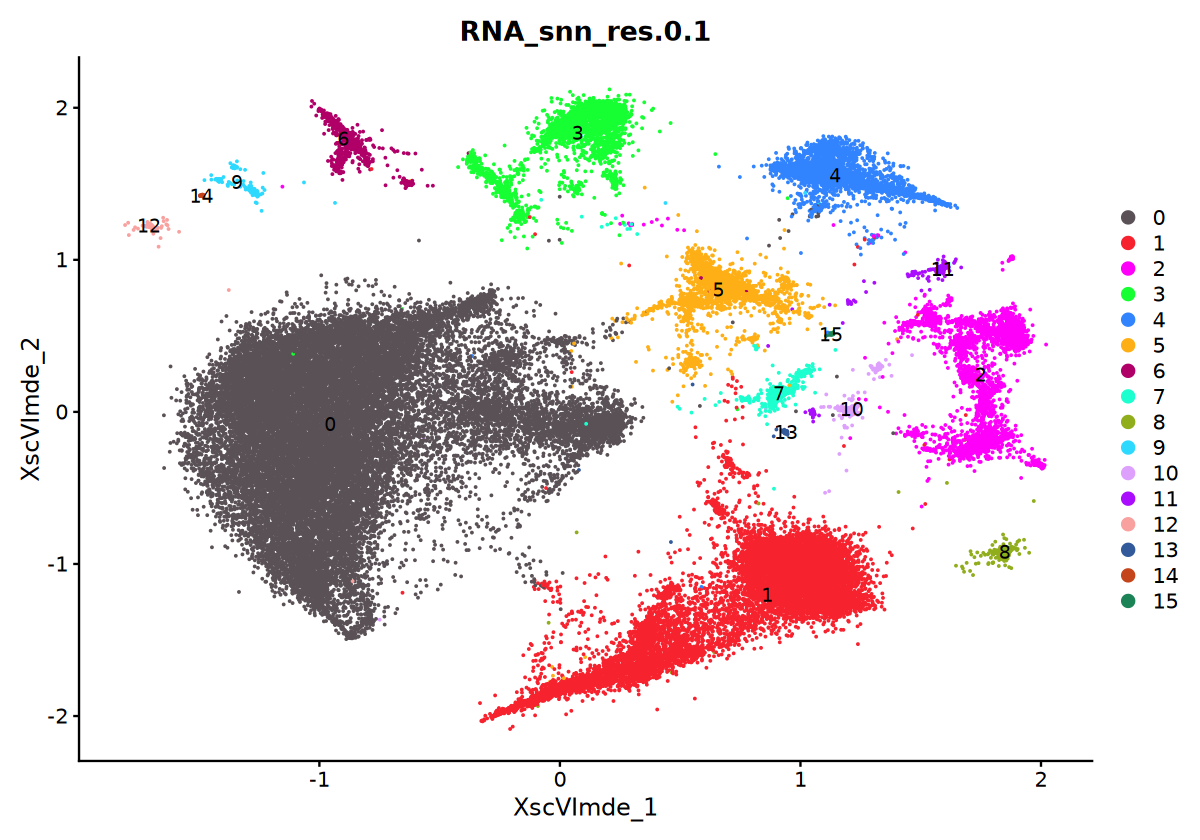

In [38]:
DimPlot(object = zheng_et_al_filtered, 
        shuffle = TRUE, 
        reduction = 'XscVImde_', 
        group.by = "RNA_snn_res.0.1", 
        cols = my_colours, 
        label = TRUE)

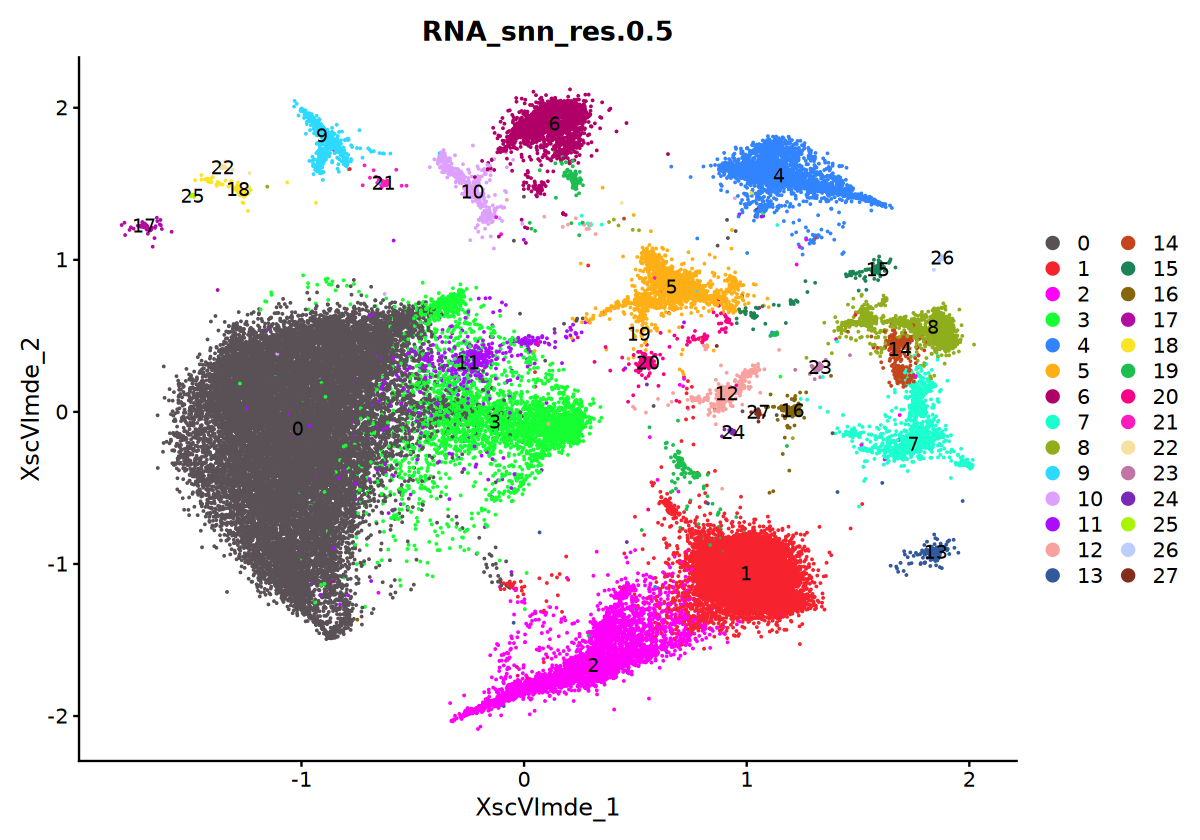

In [39]:
DimPlot(object = zheng_et_al_filtered, 
        shuffle = TRUE, 
        reduction = 'XscVImde_', 
        group.by = "RNA_snn_res.0.5", 
        cols = my_colours, 
        label = TRUE)

In [40]:
# Cell type annotation:

    From article:
    
    "including vascular smooth muscle cells (SMC);
    perivascular fibroblast-like cells (FB); 
    central nervous system (CNS)-associated macrophages (CAM);
    monocyte-derived cells (MdC); 
    venous endothelial cells (vEC); 
    capillary endothelial cells (capEC); 
    arterial endothelial cells (aEC); 
    pericytes (PC); 
    choroid plexus capillary endothelial cells (CPC); 
    ependymocytes (EPC); 
    microglia (MG); 
    neutrophils (NEUT); 
    astrocytes (ASC); 
    oligodendrocytes (OLG); 
    neural progenitor cells (NPC);
    lymphocytes(LYM); 
    red blood cell (RBC)."

In [41]:
zheng_et_al_SCE <- as.SingleCellExperiment(zheng_et_al_filtered)

Warning message:
"Layer 'scale.data' is empty"


In [42]:
zheng_et_al_SCE

class: SingleCellExperiment 
dim: 19707 56192 
metadata(0):
assays(2): counts logcounts
rownames(19707): Xkr4 Gm1992 ... DHRSX CAAA01147332.1
rowData names(0):
colnames(56192): AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
  AAACCTGAGCTAACAA-1-GSM5319988_sham2_ ...
  TTTGTCAGTGTGCCTG-1-GSM5319991_MCAO2_
  TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_
colData names(38): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(4): XPCA_ XSCVI_ XSCVIMDE_ XUMAP_
mainExpName: RNA
altExpNames(0):

    ## S4 method for signature 'ANY'
    scoreMarkers(
      x,
      groups,
      block = NULL,
      pairings = NULL,
      lfc = 0,
      row.data = NULL,
      full.stats = FALSE,
      subset.row = NULL,
      BPPARAM = SerialParam()
    )

In [43]:
marker.info <- scran::scoreMarkers(zheng_et_al_SCE, zheng_et_al_SCE$`RNA_snn_res.0.1`)

In [44]:
marker.info %>% head()

List of length 6
names(6): 0 1 2 3 4 5

In [45]:
colnames(marker.info[["0"]]) # statistics for cluster 1.

[1] "self.average"          "other.average"         "self.detected"        
 [4] "other.detected"        "mean.logFC.cohen"      "min.logFC.cohen"      
 [7] "median.logFC.cohen"    "max.logFC.cohen"       "rank.logFC.cohen"     
[10] "mean.AUC"              "min.AUC"               "median.AUC"           
[13] "max.AUC"               "rank.AUC"              "mean.logFC.detected"  
[16] "min.logFC.detected"    "median.logFC.detected" "max.logFC.detected"   
[19] "rank.logFC.detected"

In [46]:
chosen <- marker.info[["0"]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
head(ordered[,1:4]) # showing basic stats only, for brevity.

DataFrame with 6 rows and 4 columns
        self.average other.average self.detected other.detected
           <numeric>     <numeric>     <numeric>      <numeric>
Cldn5        3.96060      1.218594      0.998775       0.600286
Slc2a1       3.25175      1.007317      0.985569       0.555500
Ly6c1        4.09733      1.735485      0.998545       0.777944
Slco1a4      3.05672      0.684074      0.952459       0.367367
Ly6a         3.88469      1.597883      0.997589       0.721330
Bsg          4.88189      2.857092      0.998890       0.968963

In [47]:
# they are endothelial cells.

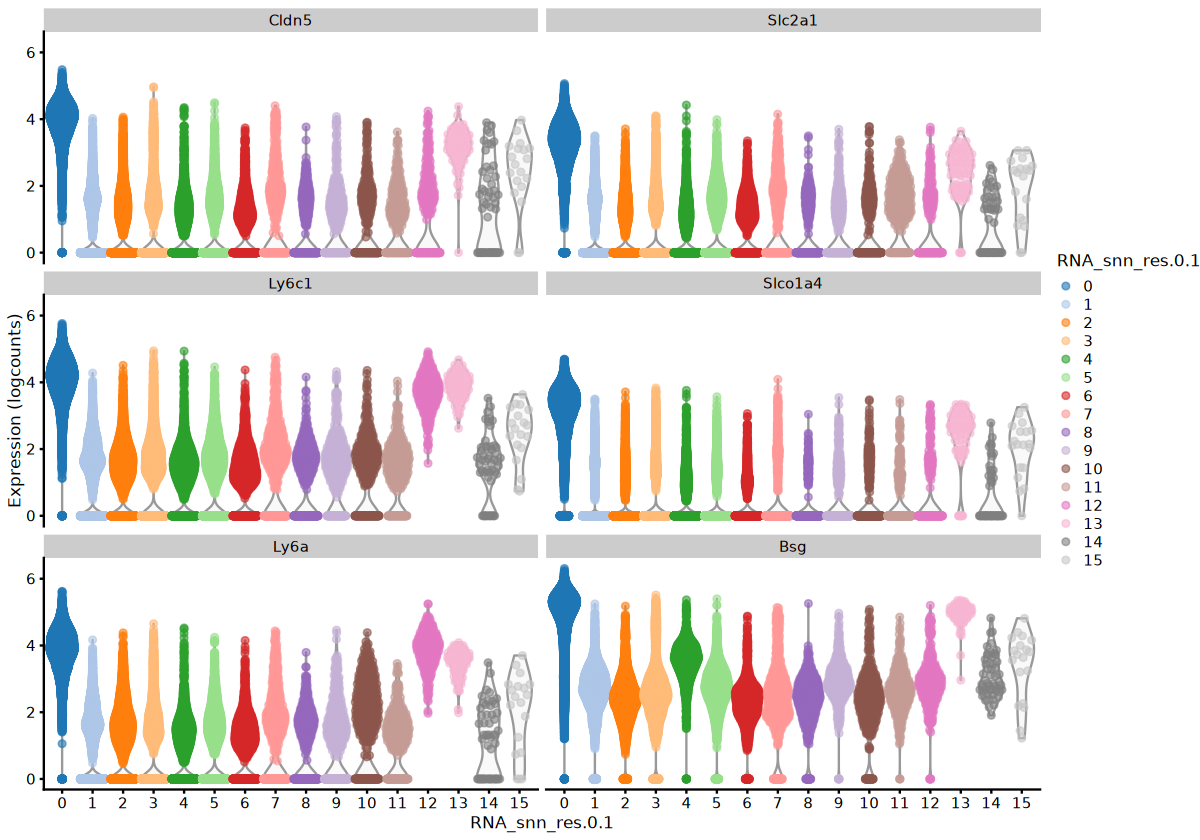

In [48]:
# library(scater)
scater::plotExpression(zheng_et_al_SCE, features=head(rownames(ordered)), 
    x="RNA_snn_res.0.1", colour_by="RNA_snn_res.0.1")

In [49]:
chosen <- marker.info[["1"]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
head(ordered[,1:4]) # showing basic stats only, for brevity.

DataFrame with 6 rows and 4 columns
     self.average other.average self.detected other.detected
        <numeric>     <numeric>     <numeric>      <numeric>
Hexb      4.45752       1.39881      0.998903       0.688769
Lgmn      4.02989       1.42939      0.999156       0.683239
Ctss      4.32873       1.57409      0.999747       0.709303
C1qc      4.25596       1.41626      0.998734       0.656844
C1qb      4.48570       1.76256      0.999747       0.766781
C1qa      4.32032       1.57249      0.998481       0.707247

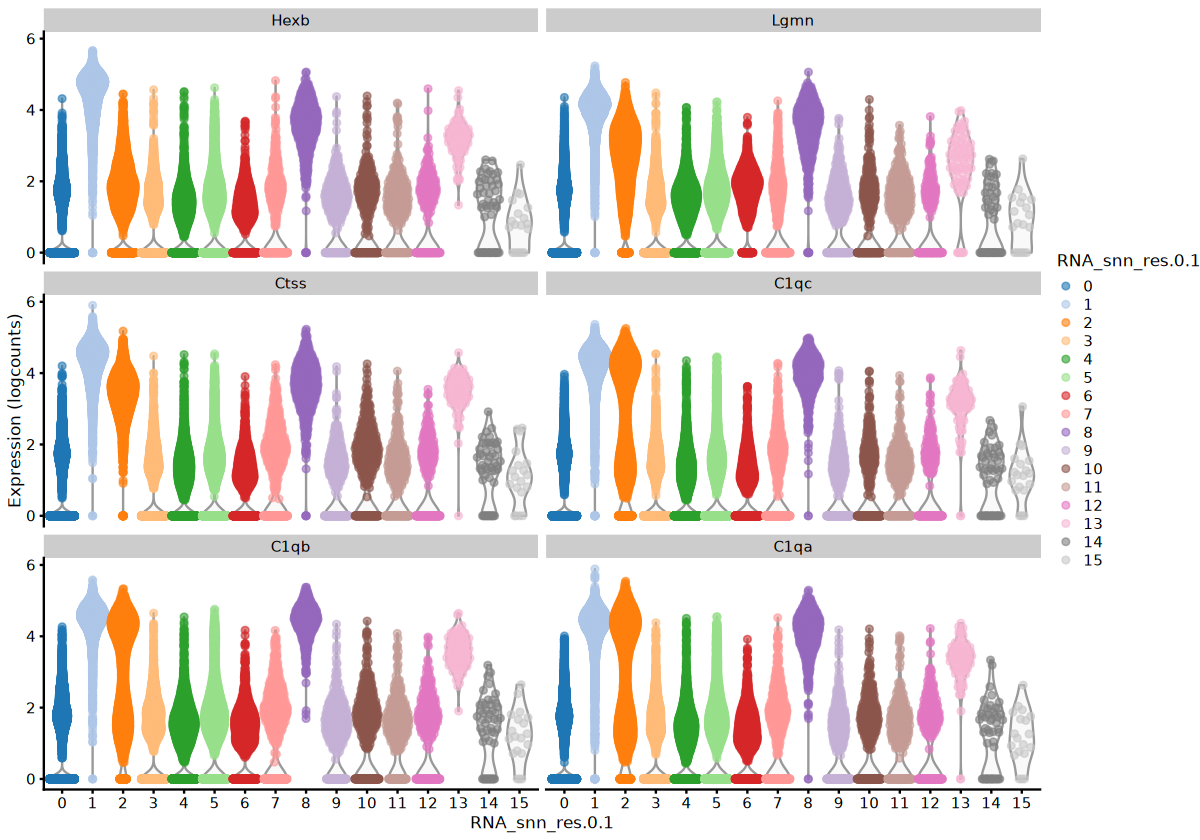

In [50]:
# library(scater)
scater::plotExpression(zheng_et_al_SCE, features=head(rownames(ordered)), 
    x="RNA_snn_res.0.1", colour_by="RNA_snn_res.0.1")

In [51]:
chosen <- marker.info[["0"]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
head(ordered[,1:4]) # showing basic stats only, for brevity.

DataFrame with 6 rows and 4 columns
        self.average other.average self.detected other.detected
           <numeric>     <numeric>     <numeric>      <numeric>
Cldn5        3.96060      1.218594      0.998775       0.600286
Slc2a1       3.25175      1.007317      0.985569       0.555500
Ly6c1        4.09733      1.735485      0.998545       0.777944
Slco1a4      3.05672      0.684074      0.952459       0.367367
Ly6a         3.88469      1.597883      0.997589       0.721330
Bsg          4.88189      2.857092      0.998890       0.968963

In [52]:
all_markers <- head(ordered[,1:4])

for (i in as.character(1:15)) {


chosen <- marker.info[[i]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
all_markers <- rbind(all_markers, head(ordered[,1:4])) # showing basic stats only, for brevity.

}

In [53]:
all_markers %>% dim()

[1] 96  4

In [54]:
all_markers %>% as.data.frame() %>% print()

              self.average other.average self.detected other.detected
Cldn5             3.960598   1.218593926     0.9987751    0.600285873
Slc2a1            3.251750   1.007316521     0.9855694    0.555500440
Ly6c1             4.097331   1.735484669     0.9985455    0.777944168
Slco1a4           3.056716   0.684073983     0.9524593    0.367367366
Ly6a              3.884692   1.597882680     0.9975885    0.721329568
Bsg               4.881894   2.857091656     0.9988900    0.968963494
Hexb              4.457521   1.398808305     0.9989032    0.688769497
Lgmn              4.029892   1.429389279     0.9991563    0.683238782
Ctss              4.328726   1.574085098     0.9997469    0.709302960
C1qc              4.255961   1.416259084     0.9987345    0.656843726
C1qb              4.485702   1.762557882     0.9997469    0.766781221
C1qa              4.320322   1.572485692     0.9984814    0.707246841
Lyz2              4.237446   0.945121978     0.9779429    0.517764645
Ms4a6c            2.

In [55]:
rownames(all_markers) %>% split(f = sapply(0:15, function(x) rep(x, times = 6)) %>% as.vector())

$`0`
[1] "Cldn5"   "Slc2a1"  "Ly6c1"   "Slco1a4" "Ly6a"    "Bsg"    

$`1`
[1] "Hexb" "Lgmn" "Ctss" "C1qc" "C1qb" "C1qa"

$`2`
[1] "Lyz2"   "Ms4a6c" "Ctsc"   "Fcer1g" "Cyba"   "Ftl1"  

$`3`
[1] "Cald1"  "Myl9"   "Igfbp7" "Rgs4"   "Mfge8"  "Myl6"  

$`4`
[1] "Ttr"     "Enpp2"   "Ecrg4"   "Ndufa4"  "Atp5mc1" "Ndufa1" 

$`5`
[1] "Slc1a2"  "Aldoc"   "Slc1a3"  "Mt1"     "Clu"     "Gpr37l1"

$`6`
[1] "Aplp1"  "Plp1"   "Mobp"   "Cldn11" "Mag"    "Mbp"   

$`7`
[1] "S100a8"  "S100a9"  "Msrb1"   "S100a11" "Slpi"    "Tyrobp" 

$`8`
[1] "Ctsz"   "Ctsb"   "C1qb"   "Fcer1g" "Ftl1"   "C1qa"  

$`9`
[1] "Col1a2"   "Dcn"      "Pcolce"   "Serpinf1" "Serping1" "Nupr1"   

$`10`
[1] "Rps27"  "Rpl18a" "Rpl13a" "Rpl37a" "Rpl32"  "Rps18" 

$`11`
[1] "Tuba1a"        "Hsp90aa1"      "Nnat"          "4933434E20Rik"
[5] "Dbi"           "Tmem212"      

$`12`
[1] "Plvap" "Plpp1" "Nrp1"  "Emcn"  "Cd200" "Rgcc" 

$`13`
[1] "Bsg"   "Itm2a" "Ttr"   "Ly6c1" "Cldn5" "Ly6a" 

$`14`
[1] "Npy"   "Fabp7" "Ptn"   "Frzb"  "Ncam1" "Apoe" 

$`15`
[1] "Hba-a1" "Hbb-bs" "Hba-a2" "Alas2"  "Hbb-bt" "Snca"

    From ChatGPT:
    
    Below is a cell type prediction for each cluster:
    
    Cluster 0
    Top Markers: Cldn5, Slc2a1, Ly6c1, Slco1a4, Ly6a, Bsg
    Interpretation: Cldn5 and Slc2a1 are canonical blood-brain barrier (BBB) endothelial cell markers.
    Predicted Cell Type: Brain Endothelial Cells
    
    Cluster 1
    Top Markers: Hexb, Lgmn, Ctss, C1qc, C1qb, C1qa
    Interpretation: High expression of complement components (C1qa/b/c) and Hexb is typical of microglia.
    Predicted Cell Type: Microglia
    
    Cluster 2
    Top Markers: Lyz2, Ms4a6c, Ctsc, Fcer1g, Cyba, Ftl1
    Interpretation: Lyz2 and Fcer1g suggest monocytes/macrophages; Ms4a6c and Cyba support this.
    Predicted Cell Type: Monocytes/Macrophages
    
    Cluster 3
    Top Markers: Cald1, Myl9, Igfbp7, Rgs4, Mfge8, Myl6
    Interpretation: Smooth muscle genes like Myl9, Cald1, Myl6; often associated with vascular smooth muscle cells (VSMCs).
    Predicted Cell Type: Vascular Smooth Muscle Cells
    
    Cluster 4
    Top Markers: Ttr, Enpp2, Ecrg4, Ndufa4, Atp5mc1, Ndufa1
    Interpretation: Ttr and Ecrg4 are found in choroid plexus epithelial cells.
    Predicted Cell Type: Choroid Plexus Epithelial Cells
    
    Cluster 5
    Top Markers: Slc1a2, Aldoc, Slc1a3, Mt1, Clu, Gpr37l1
    Interpretation: Slc1a2 (GLT1) and Slc1a3 (GLAST), Aldoc, and Clu are enriched in astrocytes.
    Predicted Cell Type: Astrocytes
    
    Cluster 6
    Top Markers: Aplp1, Plp1, Mobp, Cldn11, Mag, Mbp
    Interpretation: All genes are canonical oligodendrocyte markers.
    Predicted Cell Type: Oligodendrocytes
    
    Cluster 7
    Top Markers: S100a8, S100a9, Msrb1, S100a11, Slpi, Tyrobp
    Interpretation: S100a8/a9 and Tyrobp are associated with inflammatory monocytes or neutrophils.
    Predicted Cell Type: Neutrophils / Inflammatory Myeloid Cells
    
    Cluster 8
    Top Markers: Ctsz, Ctsb, C1qb, Fcer1g, Ftl1, C1qa
    Interpretation: Similar to Cluster 1, with microglial signature.
    Predicted Cell Type: Microglia (Activated/Alternative State)
    
    Cluster 9
    Top Markers: Col1a2, Dcn, Pcolce, Serpinf1, Serping1, Nupr1
    Interpretation: Collagen-related genes (Col1a2, Dcn) indicate fibroblasts or pericytes.
    Predicted Cell Type: Meningeal Fibroblasts / Pericytes
    
    Cluster 10
    Top Markers: Rps27, Rpl18a, Rpl13a, Rpl37a, Rpl32, Rps18
    Interpretation: Ribosomal proteins suggest this cluster may reflect low-quality cells / high ribosomal content, not a distinct cell type.
    Predicted Cell Type: Potential Doublets or Ribosome-High Cells
    
    Cluster 11
    Top Markers: Tuba1a, Hsp90aa1, Nnat, Dbi, Tmem212
    Interpretation: Tuba1a and Nnat are neurodevelopmental/neural progenitor markers.
    Predicted Cell Type: Neuronal Precursors / Immature Neurons
    
    Cluster 12
    Top Markers: Plvap, Plpp1, Nrp1, Emcn, Cd200, Rgcc
    Interpretation: Plvap, Emcn, and Nrp1 indicate fenestrated endothelium / angiogenic endothelial cells.
    Predicted Cell Type: Fenestrated Endothelial Cells / Angiogenic ECs
    
    Cluster 13
    Top Markers: Bsg, Itm2a, Ttr, Ly6c1, Cldn5, Ly6a
    Interpretation: Mix of endothelial and choroid plexus markers (overlap with Clusters 0 and 4).
    Predicted Cell Type: Choroid Plexus / Endothelial Hybrid
    
    Cluster 14
    Top Markers: Npy, Fabp7, Ptn, Frzb, Ncam1, Apoe
    Interpretation: Npy and Ncam1 are neuronal; Fabp7 is a radial glia marker; Ptn expressed in neuroprogenitors.
    Predicted Cell Type: Neuroblasts / Immature Neurons
    
    Cluster 15
    Top Markers: Hba-a1, Hbb-bs, Hba-a2, Alas2, Hbb-bt, Snca
    Interpretation: Hemoglobin genes (Hba, Hbb, Alas2) are specific for erythroid cells.
    Predicted Cell Type: Erythrocytes / Erythroid Precursors

In [56]:
# Define cluster-to-cell-type mapping as a named vector
celltype_map <- c(
  "0"  = "Endothelial Cells",
  "1"  = "Microglia",
  "2"  = "Monocytes/Macrophages",
  "3"  = "Vascular Smooth Muscle Cells",
  "4"  = "Choroid Plexus Epithelial Cells",
  "5"  = "Astrocytes",
  "6"  = "Oligodendrocytes",
  "7"  = "Neutrophils / Inflammatory Myeloid",
  "8"  = "Microglia (Activated)",
  "9"  = "Meningeal Fibroblasts / Pericytes",
  "10" = "Ribosome-High / Low-quality",
  "11" = "Neuronal Precursors",
  "12" = "Fenestrated Endothelial Cells",
  "13" = "Choroid Plexus / Endothelial Hybrid",
  "14" = "Neuroblasts / Immature Neurons",
  "15" = "Erythroid Cells"
)

In [57]:
as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`) %>% head()

[1] "0" "0" "0" "2" "2" "0"

In [58]:
celltype_map

0                                     1 
                  "Endothelial Cells"                           "Microglia" 
                                    2                                     3 
              "Monocytes/Macrophages"        "Vascular Smooth Muscle Cells" 
                                    4                                     5 
    "Choroid Plexus Epithelial Cells"                          "Astrocytes" 
                                    6                                     7 
                   "Oligodendrocytes"  "Neutrophils / Inflammatory Myeloid" 
                                    8                                     9 
              "Microglia (Activated)"   "Meningeal Fibroblasts / Pericytes" 
                                   10                                    11 
        "Ribosome-High / Low-quality"                 "Neuronal Precursors" 
                                   12                                    13 
      "Fenestrated Endothelial Cells" "Choroid Plexus / Endothelial Hybrid" 
                                   14                                    15 
     "Neuroblasts / Immature Neurons"                     "Erythroid Cells"

In [59]:
zheng_et_al_filtered$`RNA_snn_res.0.1` %>% table()

.
    0     1     2     3     4     5     6     7     8     9    10    11    12 
26125 11853  4307  3702  3043  3019  1471   584   515   406   405   308   302 
   13    14    15 
   81    52    19 

In [60]:
as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`) %>% head()

[1] "0" "0" "0" "2" "2" "0"

In [61]:
celltype_map["0"]

0 
"Endothelial Cells"

In [62]:
celltype_map[
  as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`)
] %>% head()

0                       0                       0 
    "Endothelial Cells"     "Endothelial Cells"     "Endothelial Cells" 
                      2                       2                       0 
"Monocytes/Macrophages" "Monocytes/Macrophages"     "Endothelial Cells"

In [63]:
# Add predicted cell types as a new column
zheng_et_al_filtered$cell_type_by_LLM <- celltype_map[
  as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`)
] %>% unname()

In [64]:
zheng_et_al_filtered$cell_type_by_LLM %>% table()

.
                         Astrocytes Choroid Plexus / Endothelial Hybrid 
                               3019                                  81 
    Choroid Plexus Epithelial Cells                   Endothelial Cells 
                               3043                               26125 
                    Erythroid Cells       Fenestrated Endothelial Cells 
                                 19                                 302 
  Meningeal Fibroblasts / Pericytes                           Microglia 
                                406                               11853 
              Microglia (Activated)               Monocytes/Macrophages 
                                515                                4307 
     Neuroblasts / Immature Neurons                 Neuronal Precursors 
                                 52                                 308 
 Neutrophils / Inflammatory Myeloid                    Oligodendrocytes 
                                584              

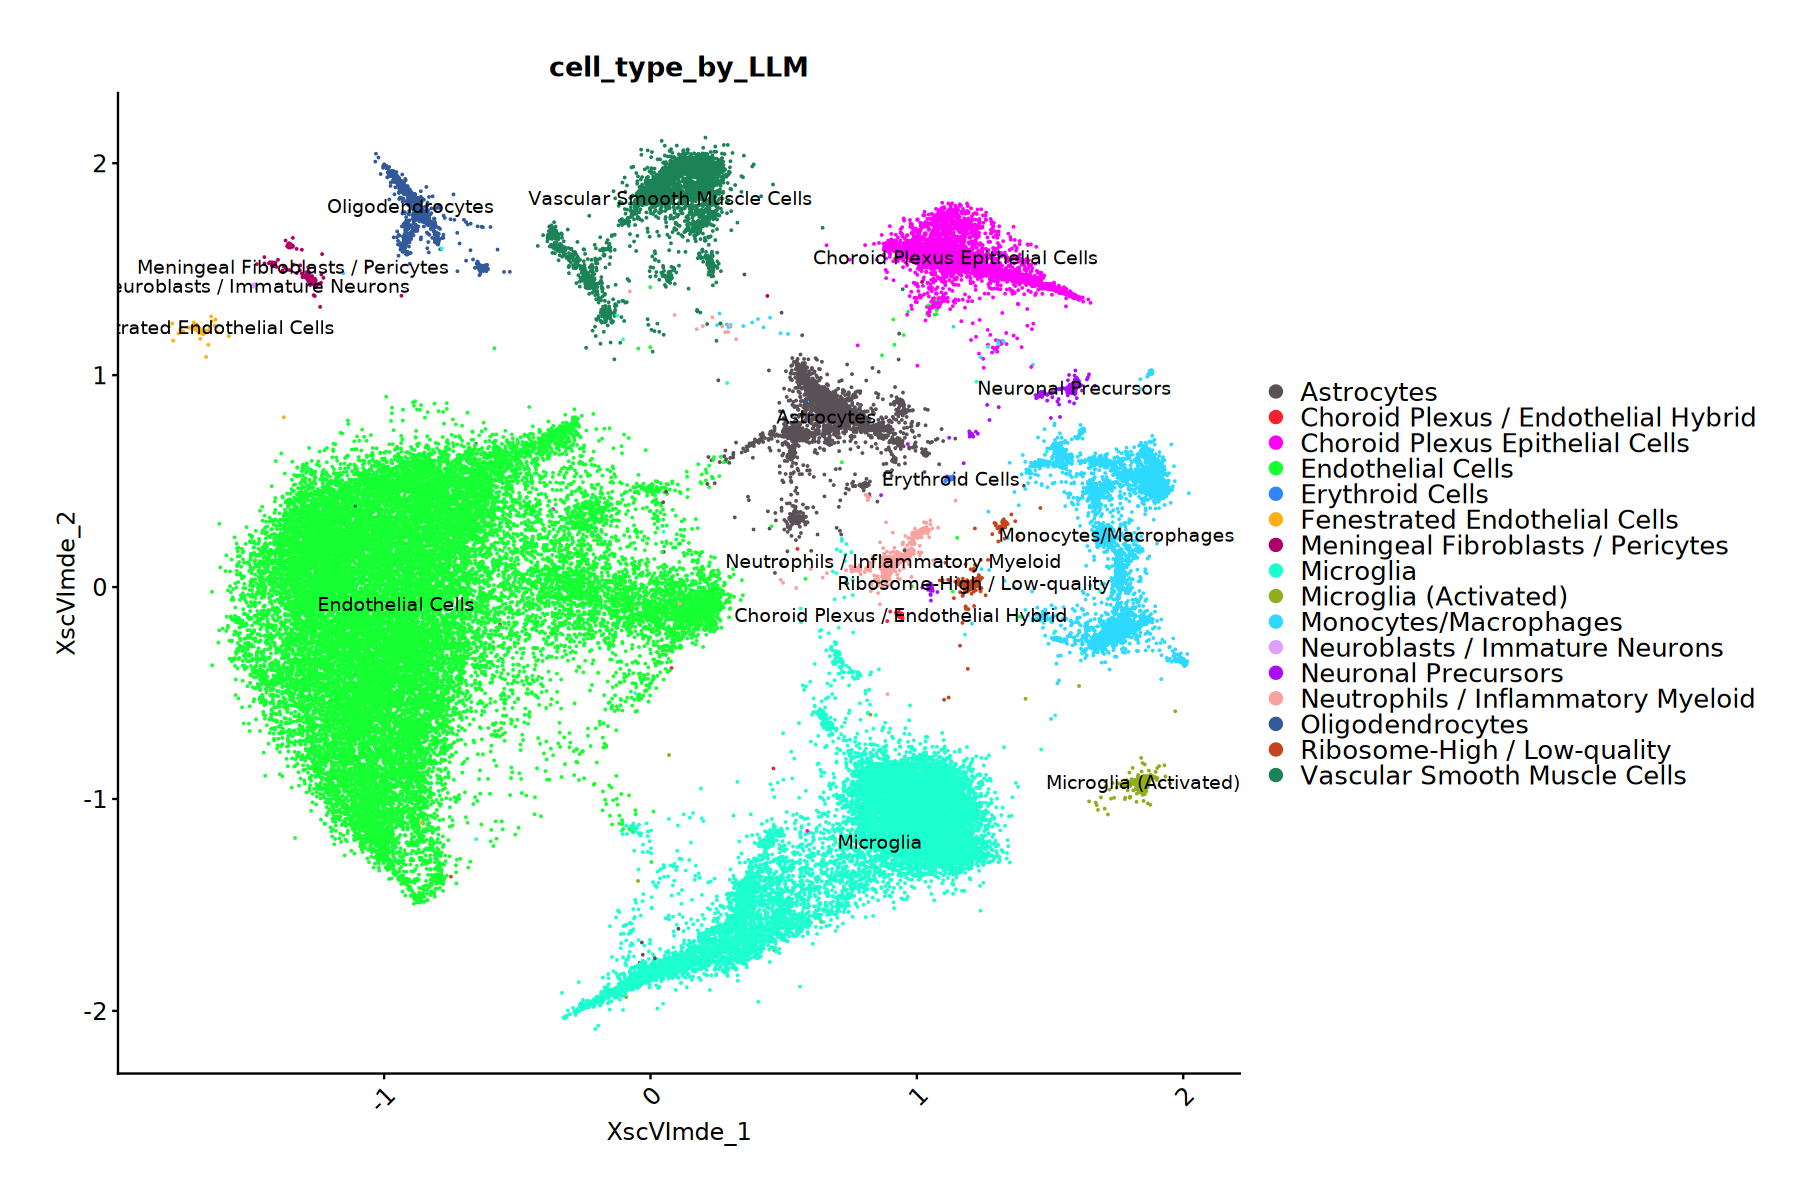

In [65]:
options(repr.plot.width = 15, repr.plot.height = 10)

DimPlot(object = zheng_et_al_filtered, 
        shuffle = TRUE, 
        reduction = 'XscVImde_', 
        group.by = "cell_type_by_LLM", 
        cols = my_colours, 
        label = TRUE) + my_theme + my_margin

    From article:
    
    "including vascular smooth muscle cells (SMC);
    perivascular fibroblast-like cells (FB); 
    central nervous system (CNS)-associated macrophages (CAM);
    monocyte-derived cells (MdC); 
    venous endothelial cells (vEC); 
    capillary endothelial cells (capEC); 
    arterial endothelial cells (aEC); 
    pericytes (PC); 
    choroid plexus capillary endothelial cells (CPC); 
    ependymocytes (EPC); 
    microglia (MG); 
    neutrophils (NEUT); 
    astrocytes (ASC); 
    oligodendrocytes (OLG); 
    neural progenitor cells (NPC);
    lymphocytes(LYM); 
    red blood cell (RBC)."

In [66]:
# I will use other approaches from OSCA such as SingleR:
# celldex package can be used to access some ref datasets:

In [67]:
ref_1 <- celldex::BlueprintEncodeData()

In [68]:
ref_1

class: SummarizedExperiment 
dim: 19859 259 
metadata(0):
assays(1): logcounts
rownames(19859): TSPAN6 TNMD ... LINC00550 GIMAP1-GIMAP5
rowData names(0):
colnames(259): mature.neutrophil
  CD14.positive..CD16.negative.classical.monocyte ...
  epithelial.cell.of.umbilical.artery.1
  dermis.lymphatic.vessel.endothelial.cell.1
colData names(3): label.main label.fine label.ont

In [69]:
ref_1$label.main %>% unique()

[1] "Neutrophils"       "Monocytes"         "HSC"              
 [4] "CD4+ T-cells"      "CD8+ T-cells"      "NK cells"         
 [7] "B-cells"           "Macrophages"       "Erythrocytes"     
[10] "Endothelial cells" "DC"                "Eosinophils"      
[13] "Chondrocytes"      "Fibroblasts"       "Smooth muscle"    
[16] "Epithelial cells"  "Melanocytes"       "Skeletal muscle"  
[19] "Keratinocytes"     "Myocytes"          "Adipocytes"       
[22] "Neurons"           "Pericytes"         "Astrocytes"       
[25] "Mesangial cells"

In [70]:
ref_1$label.fine %>% unique()

[1] "Neutrophils"                   "Monocytes"                    
 [3] "MEP"                           "CD4+ T-cells"                 
 [5] "Tregs"                         "CD4+ Tcm"                     
 [7] "CD4+ Tem"                      "CD8+ Tcm"                     
 [9] "CD8+ Tem"                      "NK cells"                     
[11] "naive B-cells"                 "Memory B-cells"               
[13] "Class-switched memory B-cells" "HSC"                          
[15] "MPP"                           "CLP"                          
[17] "GMP"                           "Macrophages"                  
[19] "CD8+ T-cells"                  "Erythrocytes"                 
[21] "Megakaryocytes"                "CMP"                          
[23] "Macrophages M1"                "Macrophages M2"               
[25] "Endothelial cells"             "DC"                           
[27] "Eosinophils"                   "Plasma cells"                 
[29] "Chondrocytes"                  "Fibroblasts"                  
[31] "Smooth muscle"                 "Epithelial cells"             
[33] "Melanocytes"                   "Skeletal muscle"              
[35] "Keratinocytes"                 "mv Endothelial cells"         
[37] "Myocytes"                      "Adipocytes"                   
[39] "Neurons"                       "Pericytes"                    
[41] "Preadipocytes"                 "Astrocytes"                   
[43] "Mesangial cells"

In [71]:
ref_1$label.ont %>% unique()

[1] "CL:0000775" "CL:0000576" "CL:0000050" "CL:0000624" "CL:0000815"
 [6] "CL:0000904" "CL:0000905" "CL:0000907" "CL:0000913" "CL:0000623"
[11] "CL:0000788" "CL:0000787" "CL:0000972" "CL:0000037" "CL:0000837"
[16] "CL:0000051" "CL:0000557" "CL:0000235" "CL:0000625" "CL:0000232"
[21] "CL:0000556" "CL:0000049" "CL:0000863" "CL:0000890" "CL:0000115"
[26] "CL:0000451" "CL:0000771" "CL:0000786" "CL:0000138" "CL:0000057"
[31] "CL:0000192" "CL:0000066" "CL:0000148" "CL:0000188" "CL:0000312"
[36] "CL:2000008" "CL:0000187" "CL:0000136" "CL:0000540" "CL:0000669"
[41] NA           "CL:0000127" "CL:0000650"

====================================

firstly, try with raw counts:

In [72]:
pred <- SingleR::SingleR(test=zheng_et_al_SCE, assay.type.test = 'counts', ref=ref_1, labels=ref_1$label.main)

In [73]:
table(pred$labels)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
                9             32635             14209                 6 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
              104                91               255                17 
      Eosinophils  Epithelial cells      Erythrocytes       Fibroblasts 
              404              4022                 4               126 
              HSC     Keratinocytes       Macrophages       Melanocytes 
               11                50               265               176 
  Mesangial cells         Monocytes          Myocytes           Neurons 
                1               224                 1               268 
      Neutrophils         Pericytes   Skeletal muscle     Smooth muscle 
             2023                17                32              1242 

In [74]:
# It could not correctly assign the endothelial cluster.

In [75]:
# singleR diagnostic heatmap:
# column labels show predicted cell types.
# each row label shows the expression levels of a spesific cell type markers
# across all cells. 
# High confident column labels should have distinguished ecxpression of the
# markers of predicted cell type.
# So the intersection of row and column labels should be yellow exclusively.

options(repr.plot.width = 30, repr.plot.height = 30) 

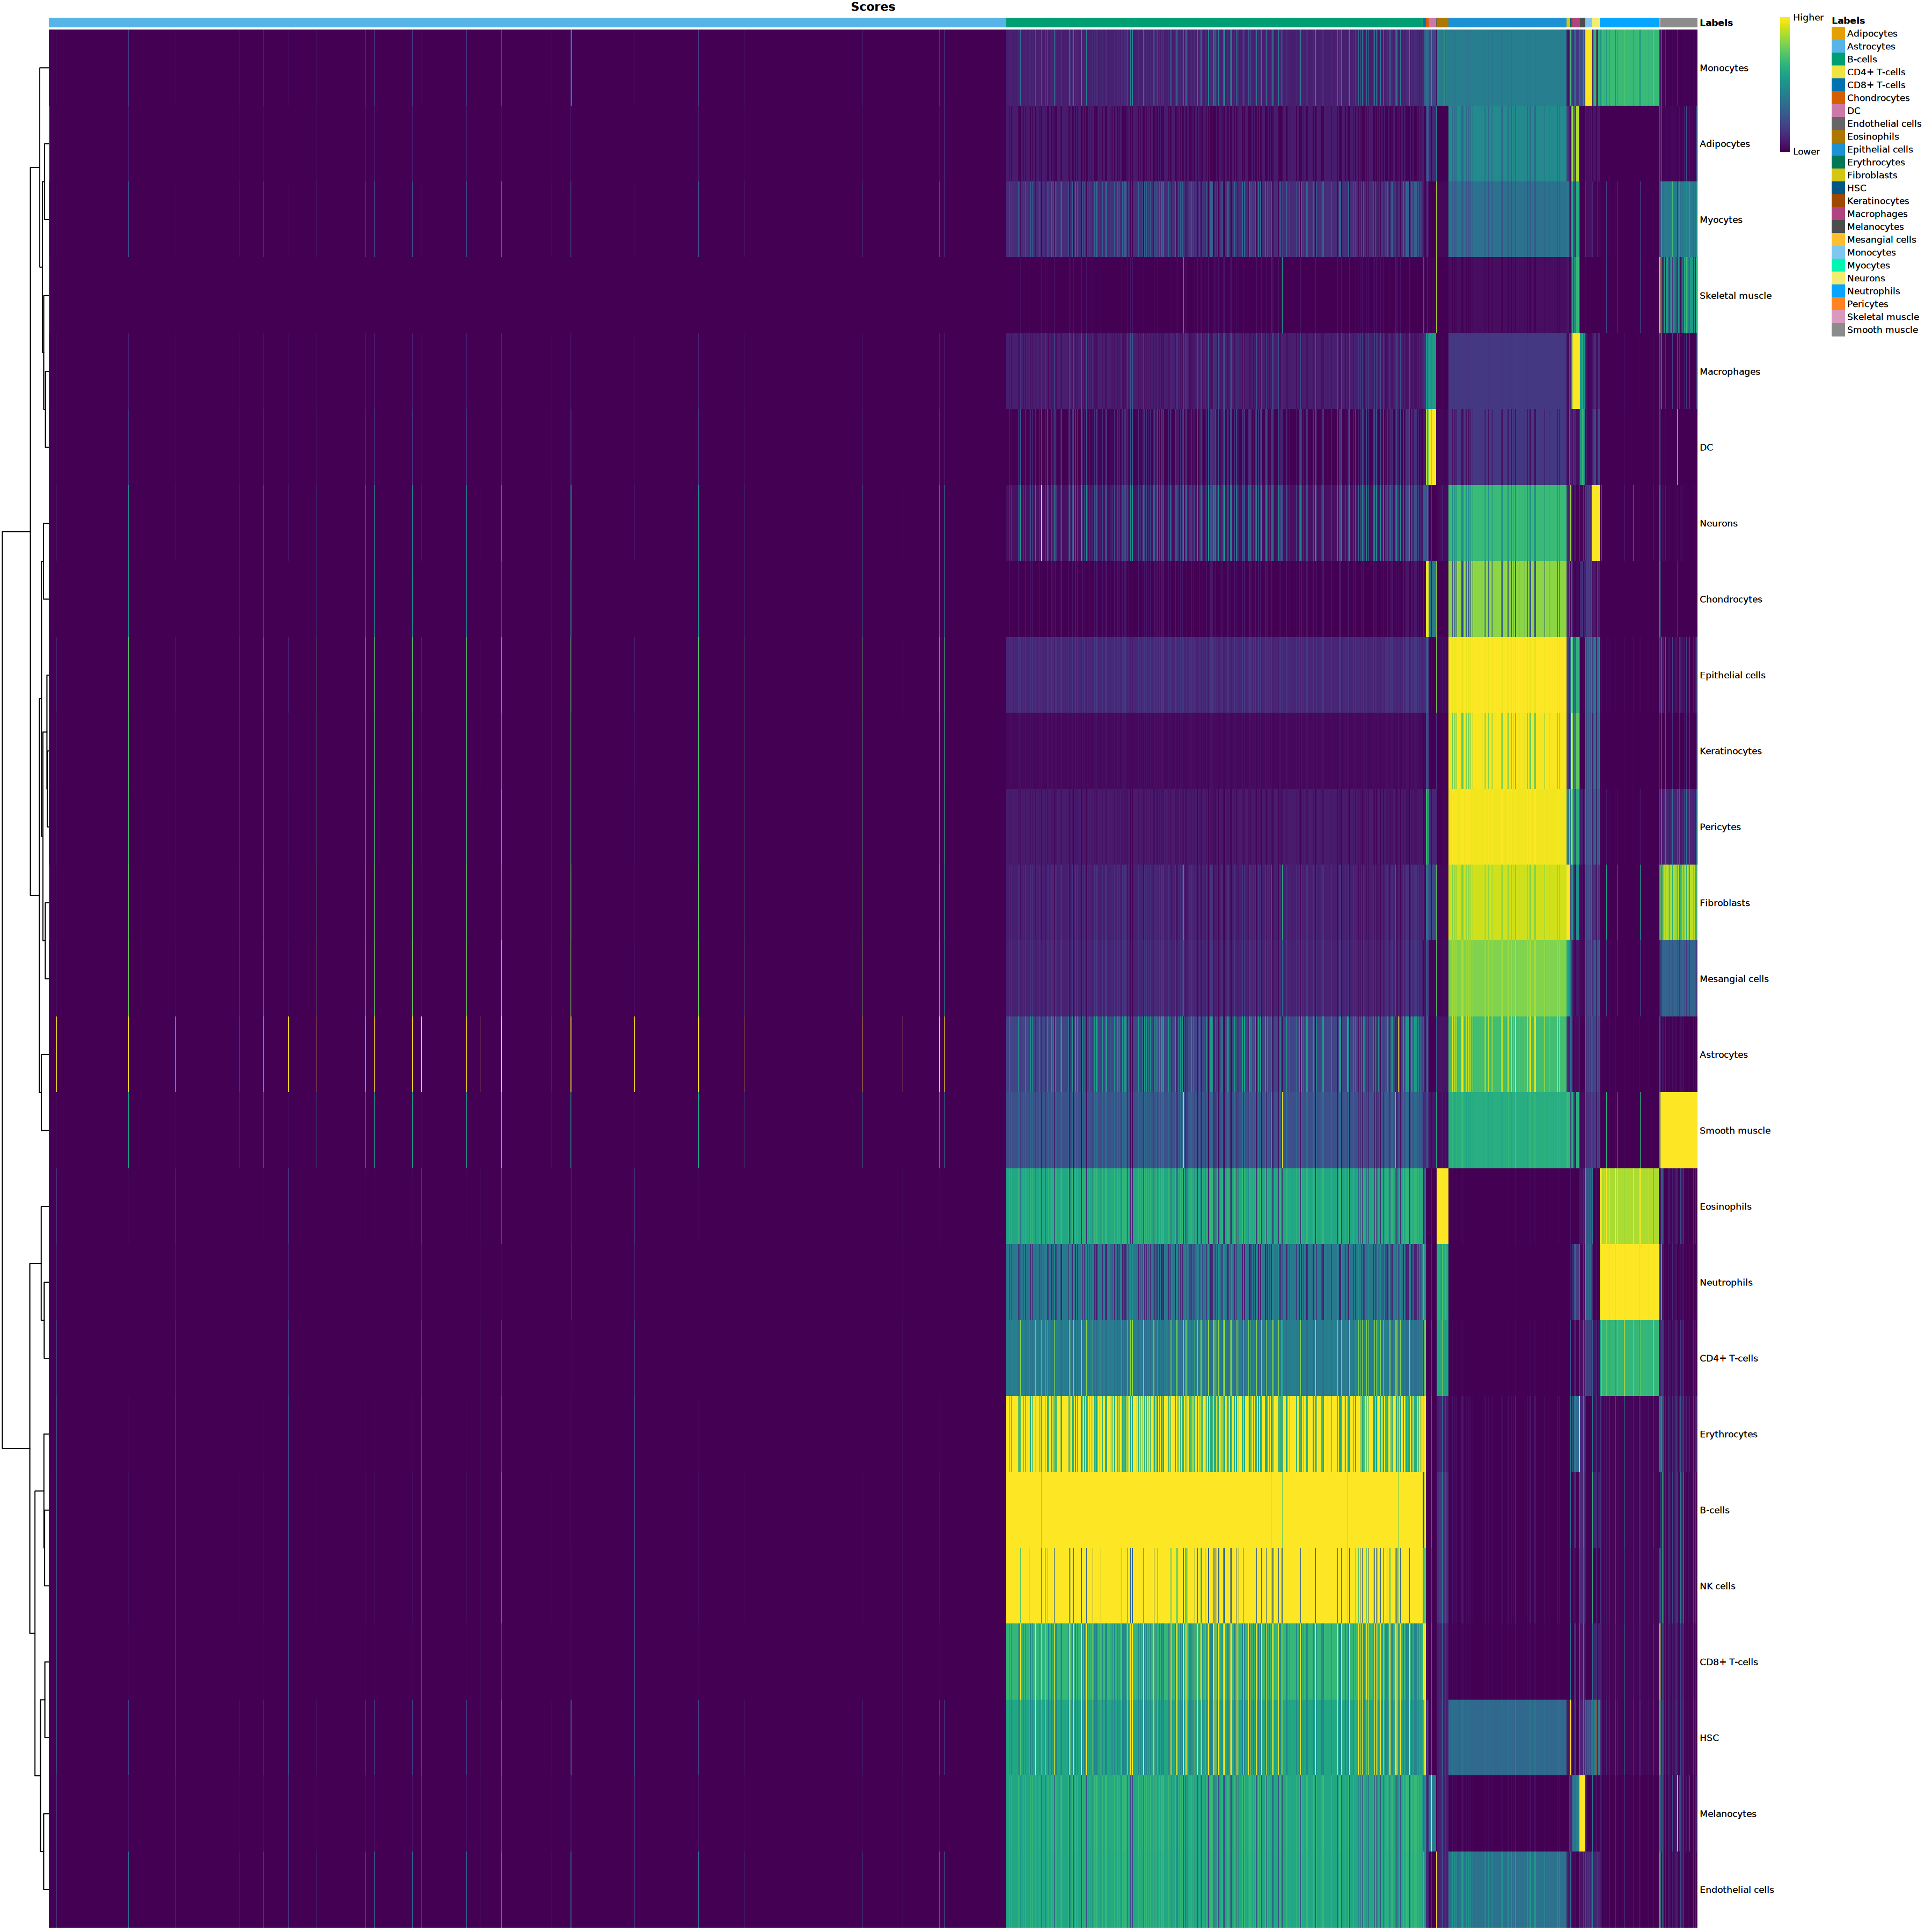

In [76]:
SingleR::plotScoreHeatmap(pred)

In [77]:
identical(Cells(zheng_et_al_filtered), rownames(pred))

[1] TRUE

In [78]:
table(zheng_et_al_filtered$`RNA_snn_res.0.1`, pred$labels)

    
     Adipocytes Astrocytes B-cells CD4+ T-cells CD8+ T-cells Chondrocytes    DC
  0           3      18632    5933            3           21            3    26
  1           0       5608    5416            0           70            2    16
  2           2       1546    1089            1            7            2   159
  3           0       2759     706            0            3            3    20
  4           0       1053     221            2            0            1     4
  5           0        514      84            0            2           51     6
  6           0        983     350            0            1            0    11
  7           0        359      53            0            0            0     1
  8           0        400      77            0            0            0     2
  9           4        111      35            0            0           28     6
  10          0        269     108            0            0            0     1
  11          0        100      49 

In [83]:
# pivot wider:

as.data.frame(table(zheng_et_al_filtered$`RNA_snn_res.0.1`, pred$labels)) %>% 
reshape2::dcast( Var1 ~ Var2, value.var = "Freq")

Var1 Adipocytes Astrocytes B-cells CD4+ T-cells CD8+ T-cells Chondrocytes
1  0    3          18632      5933    3            21            3          
2  1    0           5608      5416    0            70            2          
3  2    2           1546      1089    1             7            2          
4  3    0           2759       706    0             3            3          
5  4    0           1053       221    2             0            1          
6  5    0            514        84    0             2           51          
7  6    0            983       350    0             1            0          
8  7    0            359        53    0             0            0          
9  8    0            400        77    0             0            0          
10 9    4            111        35    0             0           28          
11 10   0            269       108    0             0            0          
12 11   0            100        49    0             0            1          
13 12   0            227        55    0             0            0          
14 13   0             49        18    0             0            0          
15 14   0             14         8    0             0            0          
16 15   0             11         7    0             0            0          
   DC  Endothelial cells Eosinophils ... Macrophages Melanocytes
1   26 5                  58         ... 32           12        
2   16 2                  20         ... 33           15        
3  159 0                  13         ... 86          137        
4   20 3                   1         ...  4            2        
5    4 1                 300         ...  2            2        
6    6 0                   0         ...  9            1        
7   11 0                   5         ...  3            1        
8    1 0                   3         ... 67            0        
9    2 0                   0         ...  1            0        
10   6 3                   1         ...  3            2        
11   1 0                   0         ...  0            1        
12   2 2                   2         ... 24            3        
13   0 1                   0         ...  1            0        
14   1 0                   0         ...  0            0        
15   0 0                   1         ...  0            0        
16   0 0                   0         ...  0            0        
   Mesangial cells Monocytes Myocytes Neurons Neutrophils Pericytes
1  0                21       0        35       517        0        
2  0                 8       0        54        96        1        
3  0                 5       0         7        73        6        
4  0                 2       0         7        28        0        
5  0               137       0         0      1235        0        
6  0                30       0        73         4        7        
7  0                 3       0         8        19        0        
8  0                 3       0         1        25        1        
9  0                 0       0         1         6        0        
10 1                 8       1        10         1        2        
11 0                 0       0         1         4        0        
12 0                 2       0        68        11        0        
13 0                 0       0         3         4        0        
14 0                 0       0         0         0        0        
15 0                 5       0         0         0        0        
16 0                 0       0         0         0        0        
   Skeletal muscle Smooth muscle
1  11              124          
2   1               62          
3   8              958          
4   3               19          
5   4                9          
6   1               10          
7   2               16          
8   1               31          
9   0                5          
10  0                0          
11  1                3          
12  0                1          
13  

In [84]:
# most endothelials are mis-labelled as astrocytes !!!

In [85]:
# try reference datasets in celldex package:

celldex::surveyReferences()

DataFrame with 7 rows and 10 columns
                    name     version        path                  title
             <character> <character> <character>            <character>
1                   dice  2024-02-26          NA Human bulk RNA-seq d..
2       blueprint_encode  2024-02-26          NA Human bulk RNA-seq d..
3                 immgen  2024-02-26          NA Mouse microarray exp..
4           mouse_rnaseq  2024-02-26          NA Bulk RNA-seq data of..
5                   hpca  2024-02-26          NA Microarray data from..
6 novershtern_hematopo..  2024-02-26          NA Bulk microarray expr..
7          monaco_immune  2024-02-26          NA Human bulk RNA-seq d..
             description taxonomy_id  genome   samples
             <character>      <List>  <List> <integer>
1 Human bulk RNA-seq d..        9606              1561
2 Human bulk RNA-seq d..        9606               259
3 Mouse microarray exp..       10090               830
4 Bulk RNA-seq data of..       10090 MGS

In [86]:
# try mouse rna seq data as ref:

ref_2 <- celldex::MouseRNAseqData()

In [87]:
pred_2 <- SingleR::SingleR(test=zheng_et_al_SCE, assay.type.test = 'counts', ref=ref_2, labels=ref_2$label.main)

In [88]:
ref_2$label.fine %>% table()

.
           Adipocytes            Astrocytes  Astrocytes activated 
                   13                    24                     3 
              B cells        Cardiomyocytes       Dendritic cells 
                    5                     8                     2 
    Endothelial cells             Ependymal          Erythrocytes 
                   12                     2                     3 
          Fibroblasts Fibroblasts activated Fibroblasts senescent 
                   27                     9                     9 
         Granulocytes           Hepatocytes           Macrophages 
                   15                     4                    26 
Macrophages activated             Microglia   Microglia activated 
                    6                    56                    16 
            Monocytes              NK cells                  NPCs 
                    6                    18                    11 
              Neurons     Neurons activated                 

In [89]:
ref_2$label.main %>% table()

.
       Adipocytes        Astrocytes           B cells    Cardiomyocytes 
               13                27                 5                 8 
  Dendritic cells Endothelial cells  Epithelial cells      Erythrocytes 
                2                12                 2                 3 
      Fibroblasts      Granulocytes       Hepatocytes       Macrophages 
               45                15                 4                32 
        Microglia         Monocytes          NK cells           Neurons 
               72                 6                18                64 
 Oligodendrocytes           T cells 
               12                18 

In [91]:
# compare predictions of GPT with mouse rna seq:

table(zheng_et_al_filtered$cell_type_by_LLM, pred_2$labels) %>% 
as.data.frame() %>%
reshape2::dcast(Var1 ~ Var2, value.var = "Freq")

Var1                                Adipocytes Astrocytes B cells
1  Astrocytes                          0          2545        0     
2  Choroid Plexus / Endothelial Hybrid 0             0        0     
3  Choroid Plexus Epithelial Cells     0             0        0     
4  Endothelial Cells                   0             1        0     
5  Erythroid Cells                     0             0        0     
6  Fenestrated Endothelial Cells       0             0        0     
7  Meningeal Fibroblasts / Pericytes   0             0        0     
8  Microglia                           0             0        0     
9  Microglia (Activated)               0             0        0     
10 Monocytes/Macrophages               0             1        0     
11 Neuroblasts / Immature Neurons      0             1        0     
12 Neuronal Precursors                 0             0        1     
13 Neutrophils / Inflammatory Myeloid  0             5        0     
14 Oligodendrocytes                    0             0        0     
15 Ribosome-High / Low-quality         0             0       87     
16 Vascular Smooth Muscle Cells        4             2        1     
   Cardiomyocytes Dendritic cells Endothelial cells Epithelial cells
1  0              0                 154              126            
2  0              0                  77                0            
3  0              0                  72             2939            
4  0              0               26122                0            
5  0              0                  17                0            
6  0              0                 301                0            
7  0              0                  40                8            
8  0              2                  25                2            
9  0              0                   2                1            
10 0              4                  57                7            
11 0              0                  11                6            
12 0              0                  19              250            
13 0              7                  54                0            
14 0              0                   4                0            
15 0              0                  16                1            
16 9              0                1775                9            
   Fibroblasts Granulocytes Macrophages Microglia Monocytes NK cells Neurons
1     3          1            70          46         5        0      58     
2     0          0             2           2         0        0       0     
3     0          8             8          11         3        0       0     
4     0          0             2           0         0        0       0     
5     0          0             0           2         0        0       0     
6     0          0             0           1         0        0       0     
7   350          1             4           2         0        0       0     
8     0          3          2017        9794         7        0       0     
9     0          0           421          75        15        1       0     
10    0         15          1956          40      2224        0       0     
11    1          0             0           0         0        0      16     
12    3          2             0           0         1        0      31     
13    1        510             4           1         2        0       0     
14    0          0             2           0         0        0       0     
15    0          0             3           1        12      143       0     
16 1864          0            22           8         0        1       3     
   Oligodendrocytes T cells
1    11               0    
2     0               0    
3     2               0    
4     0               0    
5     0               0    
6     0               0    
7     1               0    
8     3               0    
9     0               0    
10    1               2    
11   17               0    
12    1     

In [92]:
# mouse rnaseq data worked better than single cell ref-based annotation. 

In [93]:
options(repr.plot.width = 15, repr.plot.height = 7) 

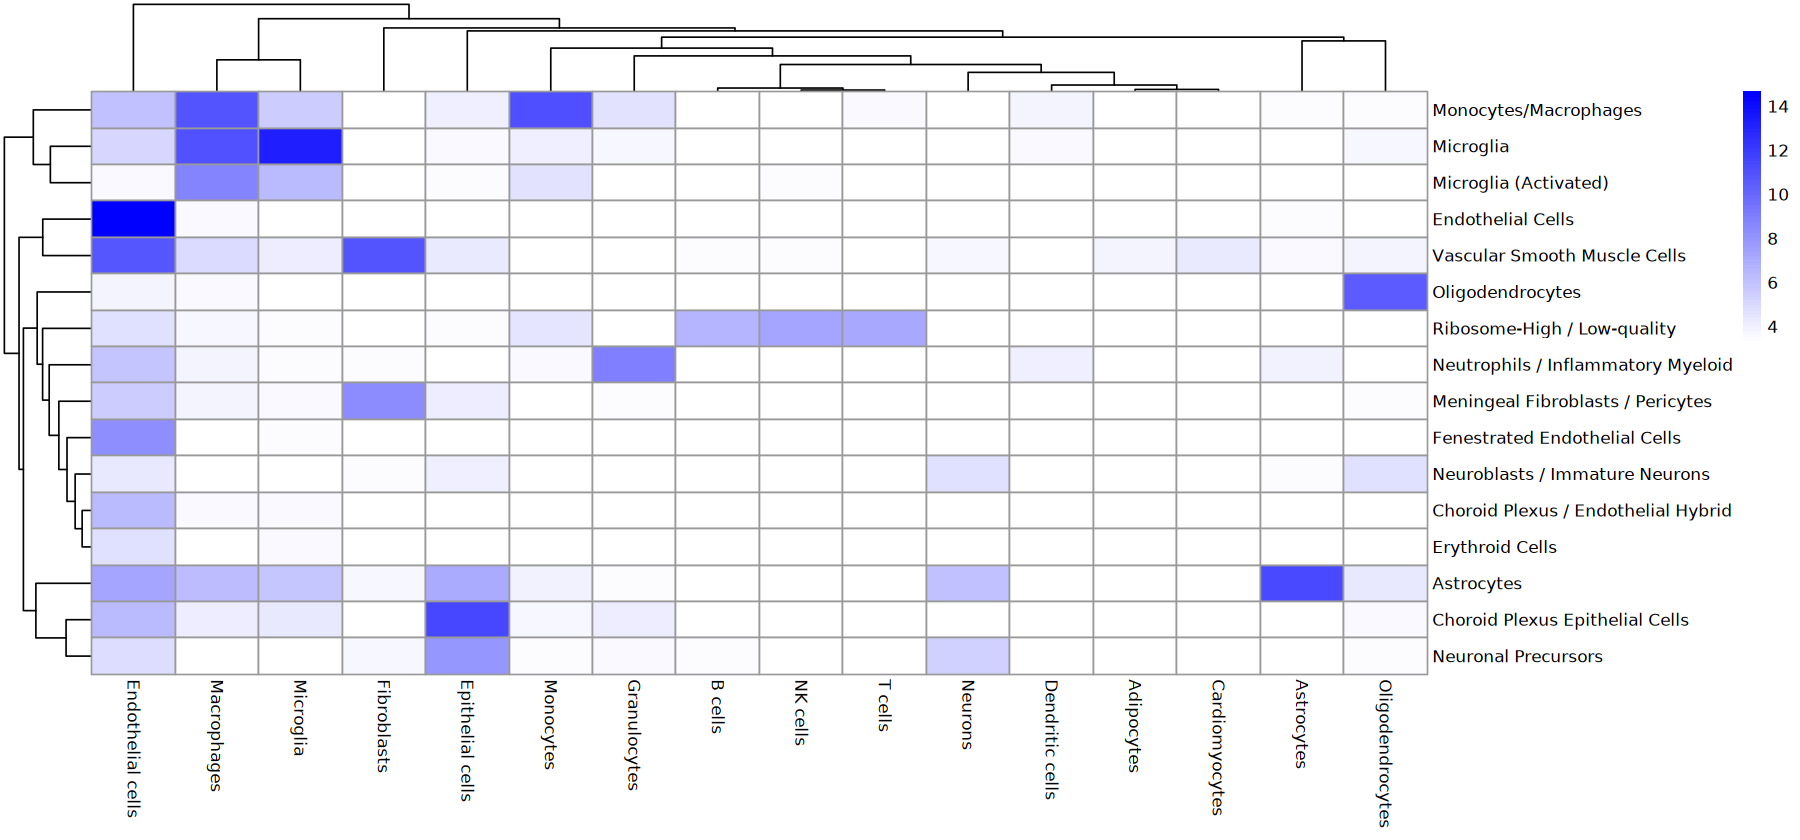

In [94]:
tab <- table(zheng_et_al_filtered$cell_type_by_LLM, pred_2$labels)
library(pheatmap)
pheatmap(log2(tab+10), color=colorRampPalette(c("white", "blue"))(101))

In [95]:
# check single cell datasets to use as refs:

In [96]:
all_datasets <- scRNAseq::surveyDatasets()

In [97]:
all_datasets$name %>% grep(pattern = 'brain', ignore.case = TRUE, value = TRUE)

[1] "marques-brain-2016"  "campbell-brain-2017" "darmanis-brain-2015"
 [4] "lamanno-brain-2016"  "lamanno-brain-2016"  "lamanno-brain-2016" 
 [7] "lamanno-brain-2016"  "lamanno-brain-2016"  "romanov-brain-2017" 
[10] "jessa-brain-2019"    "tasic-brain-2016"    "usoskin-brain-2015" 
[13] "zeisel-brain-2015"   "chen-brain-2017"

In [98]:
all_datasets$name %>% print()

 [1] "aztekin-tail-2019"           "splicing-demonstration-2020"
 [3] "marques-brain-2016"          "grun-bone_marrow-2016"      
 [5] "giladi-hsc-2018"             "giladi-hsc-2018"            
 [7] "macosko-retina-2015"         "messmer-esc-2019"           
 [9] "ernst-spermatogenesis-2019"  "ernst-spermatogenesis-2019" 
[11] "campbell-brain-2017"         "darmanis-brain-2015"        
[13] "bach-mammary-2017"           "lamanno-brain-2016"         
[15] "lamanno-brain-2016"          "lamanno-brain-2016"         
[17] "lamanno-brain-2016"          "lamanno-brain-2016"         
[19] "hu-cortex-2017"              "hu-cortex-2017"             
[21] "richard-tcell-2018"          "muraro-pancreas-2016"       
[23] "romanov-brain-2017"          "shekhar-retina-2016"        
[25] "ercc"                        "bunis-hspc-2021"            
[27] "pollen-glia-2015"            "jessa-brain-2019"           
[29] "kotliarov-pbmc-2020"         "segerstolpe-pancreas-2016"  
[31] "bacher-tcell-2020" 

In [99]:
all_datasets$name %>% grep(pattern = 'brain|cortex', ignore.case = TRUE, value = TRUE)

[1] "marques-brain-2016"     "campbell-brain-2017"    "darmanis-brain-2015"   
 [4] "lamanno-brain-2016"     "lamanno-brain-2016"     "lamanno-brain-2016"    
 [7] "lamanno-brain-2016"     "lamanno-brain-2016"     "hu-cortex-2017"        
[10] "hu-cortex-2017"         "romanov-brain-2017"     "jessa-brain-2019"      
[13] "tasic-brain-2016"       "usoskin-brain-2015"     "nowakowski-cortex-2017"
[16] "zeisel-brain-2015"      "chen-brain-2017"

In [100]:
all_datasets %>% colnames()

[1] "name"                    "version"                
 [3] "path"                    "object"                 
 [5] "title"                   "description"            
 [7] "taxonomy_id"             "genome"                 
 [9] "rows"                    "columns"                
[11] "assays"                  "column_annotations"     
[13] "reduced_dimensions"      "alternative_experiments"
[15] "sources"

In [101]:
all_datasets$genome %>% unlist() %>% unlist() %>% table()

.
  GRCh37   GRCh38   GRCm38  MGSCv37 Xenla9.1 
      14       32       37        2        1 

In [102]:
# those are mouse genomes: GRCm38 , MGSCv37

In [103]:
library(DFplyr)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'DFplyr'


The following object is masked from 'package:dplyr':

    desc




In [104]:
all_datasets %>% select(name, genome) %>% as.data.frame() %>% head()

name                        genome  
1 aztekin-tail-2019           Xenla9.1
2 splicing-demonstration-2020   GRCm38
3 marques-brain-2016            GRCm38
4 grun-bone_marrow-2016         GRCm38
5 giladi-hsc-2018              MGSCv37
6 giladi-hsc-2018              MGSCv37

In [105]:
sapply(all_datasets$genome, length) %>% table()

.
 0  1  2 
 1 78  4 

In [106]:
sapply(all_datasets$genome, length) %>% { which(. == 2) } %>% all_datasets[., ]

DataFrame with 4 rows and 15 columns
                    name     version        path                 object
             <character> <character> <character>            <character>
1 stoeckius-hashing-2018  2024-04-18    pbmc/adt  summarized_experiment
2 stoeckius-hashing-2018  2024-04-18    pbmc/hto  summarized_experiment
3 stoeckius-hashing-2018  2024-04-18    pbmc/igg  summarized_experiment
4 stoeckius-hashing-2018  2024-04-18    pbmc/rna single_cell_experiment
                   title            description  taxonomy_id        genome
             <character>            <character> <SimpleList>  <SimpleList>
1 Cell Hashing with ba.. Cell Hashing with ba..   10090,9606 GRCm38,GRCh37
2 Cell Hashing with ba.. Cell Hashing with ba..   10090,9606 GRCm38,GRCh37
3 Cell Hashing with ba.. Cell Hashing with ba..   10090,9606 GRCm38,GRCh37
4 Cell Hashing with ba.. Cell Hashing with ba..   10090,9606 GRCm38,GRCh37
       rows   columns       assays column_annotations reduced_dimensions
  <integ

In [107]:
sapply(all_datasets$genome, length) %>% { which(. == 0) } %>% all_datasets[., ]

DataFrame with 1 row and 15 columns
         name     version        path      object                 title
  <character> <character> <character> <character>           <character>
1        ercc  2023-12-20          NA  data_frame ERCC RNA Spike-In Mix
            description  taxonomy_id       genome      rows   columns
            <character> <SimpleList> <SimpleList> <integer> <integer>
1 ERCC RNA Spike-In Mix                                  NA        NA
        assays column_annotations reduced_dimensions alternative_experiments
  <SimpleList>       <SimpleList>       <SimpleList>            <SimpleList>
1                                                                           
                                                                      sources
                                                  <CompressedSplitDFrameList>
1 URL:https://assets.therm..:2024-02-23,URL:https://www.thermofi..:2024-02-23

In [108]:
all_datasets[-c(25, 45:48),] %>% pull(genome) %>% unlist() %>% stringr::str_detect(pattern = 'GRCm38|MGSCv37') %>% which() %>% dput()

c(2L, 3L, 4L, 5L, 6L, 7L, 9L, 10L, 11L, 13L, 19L, 20L, 21L, 23L, 
24L, 27L, 31L, 32L, 34L, 35L, 36L, 37L, 38L, 40L, 44L, 45L, 47L, 
48L, 50L, 52L, 55L, 56L, 58L, 76L, 77L)


In [109]:
all_datasets[c(2L, 3L, 4L, 5L, 6L, 7L, 9L, 10L, 11L, 13L, 19L, 20L, 21L, 23L, 
24L, 27L, 31L, 32L, 34L, 35L, 36L, 37L, 38L, 40L, 44L, 45L, 47L, 
48L, 50L, 52L, 55L, 56L, 58L, 76L, 77L), ] %>% pull(name) %>% print()

 [1] "splicing-demonstration-2020" "marques-brain-2016"         
 [3] "grun-bone_marrow-2016"       "giladi-hsc-2018"            
 [5] "giladi-hsc-2018"             "macosko-retina-2015"        
 [7] "ernst-spermatogenesis-2019"  "ernst-spermatogenesis-2019" 
 [9] "campbell-brain-2017"         "bach-mammary-2017"          
[11] "hu-cortex-2017"              "hu-cortex-2017"             
[13] "richard-tcell-2018"          "romanov-brain-2017"         
[15] "shekhar-retina-2016"         "pollen-glia-2015"           
[17] "bacher-tcell-2020"           "buettner-esc-2015"          
[19] "xin-pancreas-2016"           "kolodziejczyk-esc-2015"     
[21] "tasic-brain-2016"            "usoskin-brain-2015"         
[23] "lun-spikein-2017"            "zhong-prefrontal-2018"      
[25] "stoeckius-hashing-2018"      "stoeckius-hashing-2018"     
[27] "stoeckius-hashing-2018"      "stoeckius-hashing-2018"     
[29] "wu-kidney-2019"              "zeisel-nervous-2018"        
[31] "legacy"            

In [110]:
all_datasets[c(2L, 3L, 4L, 5L, 6L, 7L, 9L, 10L, 11L, 13L, 19L, 20L, 21L, 23L, 
24L, 27L, 31L, 32L, 34L, 35L, 36L, 37L, 38L, 40L, 44L, 45L, 47L, 
48L, 50L, 52L, 55L, 56L, 58L, 76L, 77L), ] %>% pull(name) %>% 
tolower() %>% grep(pattern = 'brain|cortex', value = TRUE) %>% dput()

c("marques-brain-2016", "campbell-brain-2017", "hu-cortex-2017", 
"hu-cortex-2017", "romanov-brain-2017", "tasic-brain-2016", "usoskin-brain-2015"
)


In [111]:
# use these datasets to find cell types.
# check their colData:

In [112]:
ref_sce_1 <- scRNAseq::MarquesBrainData()

In [113]:
ref_sce_1

class: SingleCellExperiment 
dim: 23556 5069 
metadata(0):
assays(1): counts
rownames(23556): Xkr4 Rp1 ... Gm20854_loc2 Erdr1
rowData names(1): symbol
colnames(5069): C1-1771017-030-C09 C1-1771017-028-G05 ...
  C1-1772089-202-B06 C1-1772117-055-D11
colData names(6): source_name age ... strain treatment
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [114]:
ref_sce_1$`inferred cell type` %>% table()

.
  COP MFOL1 MFOL2  MOL1  MOL2  MOL3  MOL4  MOL5  MOL6 NFOL1 NFOL2   OPC   PPR 
  140   353   930   401   428   497   461   835   126   219   293   310    76 

In [115]:
# not useful. go to next:

In [116]:
c("marques-brain-2016", "campbell-brain-2017", "hu-cortex-2017", 
"hu-cortex-2017", "romanov-brain-2017", "tasic-brain-2016", "usoskin-brain-2015"
)

[1] "marques-brain-2016"  "campbell-brain-2017" "hu-cortex-2017"     
[4] "hu-cortex-2017"      "romanov-brain-2017"  "tasic-brain-2016"   
[7] "usoskin-brain-2015"

In [117]:
ref_sce_1 <- scRNAseq::CampbellBrainData()

In [118]:
ref_sce_1$group %>% table()

.
 Ch10 FFast  FFed   HFD MFast  MFed Refed UFast  arc1  arc2  arc3 
 3107   347   681  3397   560   359  2619  2658  2607  2463  2288 

In [119]:
# next:
ref_sce_1 <- scRNAseq::HuCortexData()

In [120]:
ref_sce_1 %>% pull_slot(colData)

DataFrame with 42500 rows and 2 columns
               treatment    animal
             <character> <integer>
ATTGTAATAAGC          NA         1
ACTTGTCCCAGG          NA         1
CCACCTTTTAAN          NA         1
ACAGAAATATCA          NA         1
CCACCCAACTGN          NA         1
...                  ...       ...
TATGGCTGGAGC         PTZ         2
ATTCGACGATTC         PTZ         2
ATGTACTGCGGG         PTZ         2
AGGTTCACGTAA         PTZ         2
TGTGAGAAGGAA         PTZ         2

In [122]:
# next:
ref_sce_1 <- scRNAseq::RomanovBrainData()

In [123]:
ref_sce_1$`level1 class` %>% table()

.
 astrocytes endothelial   ependymal   microglia     neurons      oligos 
        267         240         356          48         898        1001 
        vsm 
         71 

In [124]:
ref_sce_1

class: SingleCellExperiment 
dim: 24341 2881 
metadata(0):
assays(1): counts
rownames(24341): Xkr4 Rp1 ... Gm20854_loc2 Erdr1
rowData names(0):
colnames(2881): 1772058147_F02 1772096158_E08 ... 1772096144_H07
  1772078016_A09
colData names(8): level1 class level2 class (neurons only) ... acute
  stress total molecules
reducedDimNames(0):
mainExpName: endogenous
altExpNames(0):

In [125]:
intersect(rownames(zheng_et_al_SCE), rownames(ref_sce_1)) %>% length()

[1] 15479

In [126]:
common_genes <- intersect(rownames(zheng_et_al_SCE), rownames(ref_sce_1))

In [127]:
zheng_et_al_SCE

class: SingleCellExperiment 
dim: 19707 56192 
metadata(0):
assays(2): counts logcounts
rownames(19707): Xkr4 Gm1992 ... DHRSX CAAA01147332.1
rowData names(0):
colnames(56192): AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
  AAACCTGAGCTAACAA-1-GSM5319988_sham2_ ...
  TTTGTCAGTGTGCCTG-1-GSM5319991_MCAO2_
  TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_
colData names(38): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(4): XPCA_ XSCVI_ XSCVIMDE_ XUMAP_
mainExpName: RNA
altExpNames(0):

In [128]:
ref_sce_1 <- scater::logNormCounts(ref_sce_1)

In [129]:
ref_sce_1

class: SingleCellExperiment 
dim: 24341 2881 
metadata(0):
assays(2): counts logcounts
rownames(24341): Xkr4 Rp1 ... Gm20854_loc2 Erdr1
rowData names(0):
colnames(2881): 1772058147_F02 1772096158_E08 ... 1772096144_H07
  1772078016_A09
colData names(9): level1 class level2 class (neurons only) ... total
  molecules sizeFactor
reducedDimNames(0):
mainExpName: endogenous
altExpNames(0):

    SingleR(
      test,
      ref,
      labels,
      method = NULL,
      clusters = NULL,
      genes = "de",
      sd.thresh = 1,
      de.method = "classic",
      de.n = NULL,
      de.args = list(),
      aggr.ref = FALSE,
      aggr.args = list(),
      recompute = TRUE,
      restrict = NULL,
      quantile = 0.8,
      fine.tune = TRUE,
      tune.thresh = 0.05,
      prune = TRUE,
      assay.type.test = "logcounts",
      assay.type.ref = "logcounts",
      check.missing = TRUE,
      num.threads = bpnworkers(BPPARAM),
      BNPARAM = NULL,
      BPPARAM = SerialParam()
    )

In [131]:
pred_3 <- SingleR::SingleR(test=zheng_et_al_SCE[common_genes,], 
                           ref=ref_sce_1[common_genes, ], 
                           assay.type.test = "logcounts",
                           assay.type.ref = "logcounts",
                           labels=ref_sce_1$`level1 class`,
                           de.method="wilcox")

In [132]:
pred_3$labels %>% table()

.
 astrocytes endothelial   ependymal   microglia     neurons      oligos 
       2820       29220         407       19274          24        1421 
        vsm 
       3026 

In [133]:
# compare predictions of GPT with mouse rna seq:

table(zheng_et_al_filtered$cell_type_by_LLM, pred_3$labels) %>% 
as.data.frame() %>%
reshape2::dcast(Var1 ~ Var2, value.var = "Freq")

Var1                                astrocytes endothelial ependymal
1  Astrocytes                          2680          66        24      
2  Choroid Plexus / Endothelial Hybrid    0          50         0      
3  Choroid Plexus Epithelial Cells       64        1432       124      
4  Endothelial Cells                      3       26078         0      
5  Erythroid Cells                        0          16         0      
6  Fenestrated Endothelial Cells          1         296         0      
7  Meningeal Fibroblasts / Pericytes      7         312         3      
8  Microglia                              0          16         0      
9  Microglia (Activated)                  0           2         0      
10 Monocytes/Macrophages                  1          72         1      
11 Neuroblasts / Immature Neurons        37           8         0      
12 Neuronal Precursors                    2          13       252      
13 Neutrophils / Inflammatory Myeloid     9          82         2      
14 Oligodendrocytes                      11          44         0      
15 Ribosome-High / Low-quality            0         106         0      
16 Vascular Smooth Muscle Cells           5         627         1      
   microglia neurons oligos vsm 
1    241      4         0      4
2     31      0         0      0
3   1379      0        35      9
4     42      0         0      2
5      3      0         0      0
6      4      0         0      1
7     73      0         2      9
8  11836      0         0      1
9    513      0         0      0
10  4226      0         0      7
11     6      0         0      1
12    21     20         0      0
13   481      0         0     10
14    30      0      1382      4
15   294      0         1      4
16    94      0         1   2974

In [134]:
options(repr.plot.width = 15, repr.plot.height = 7) 

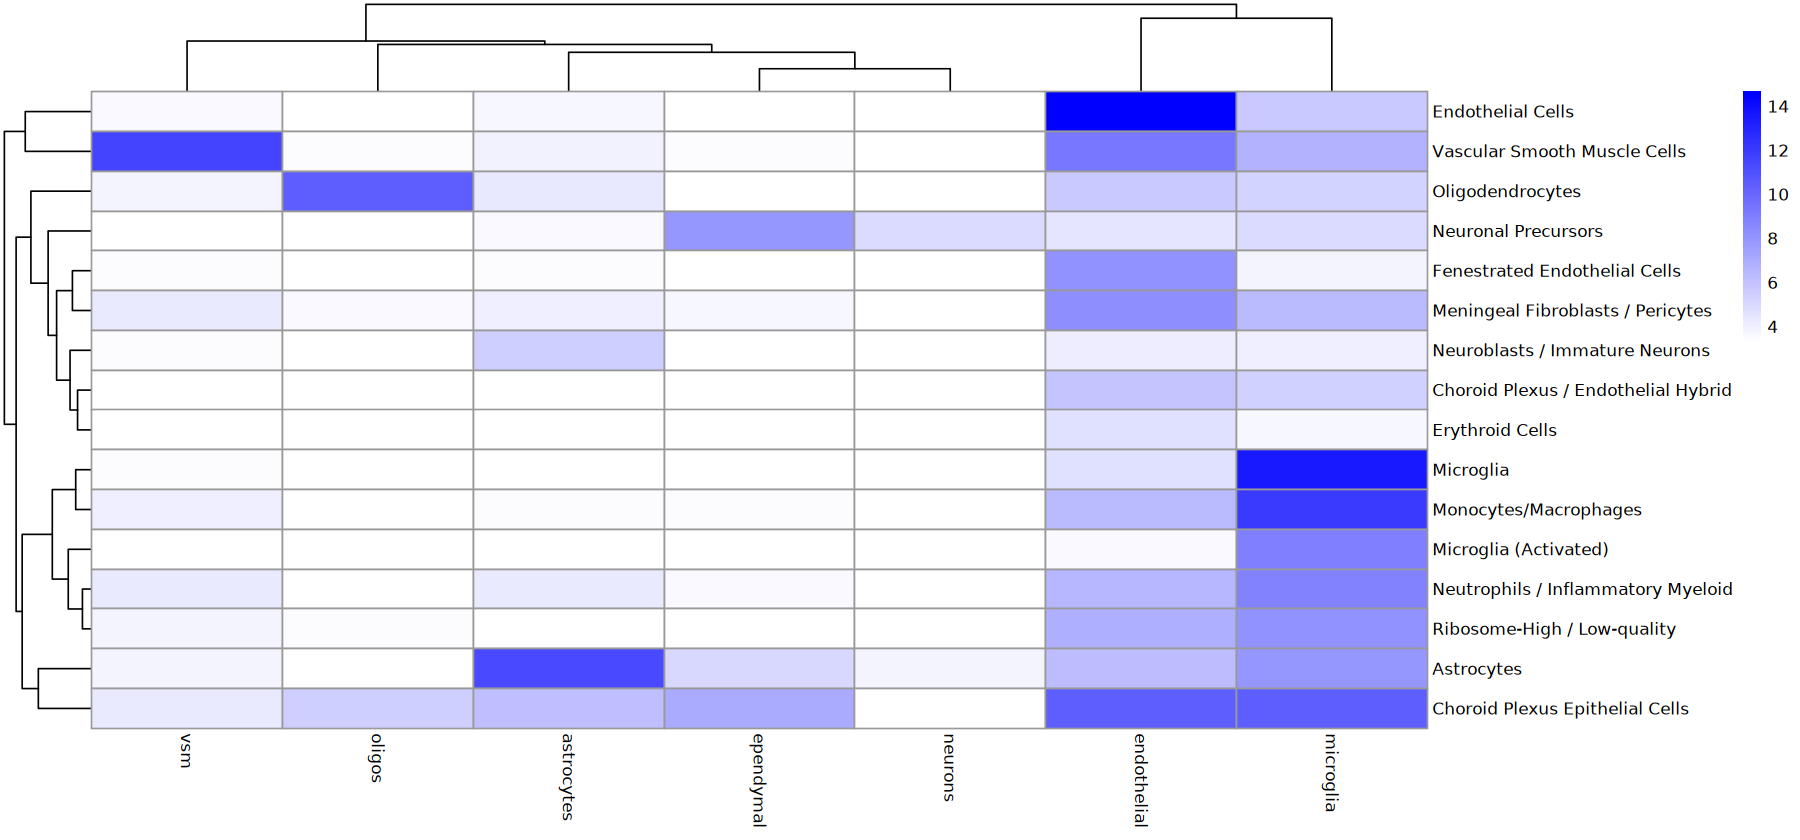

In [135]:
tab <- table(zheng_et_al_filtered$cell_type_by_LLM, pred_3$labels)
library(pheatmap)
pheatmap(log2(tab+10), color=colorRampPalette(c("white", "blue"))(101))

In [136]:
# try LLM annotation with more genes:

In [137]:
chosen <- marker.info[["0"]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
head(ordered[,1:4], 10) # showing basic stats only, for brevity.

DataFrame with 10 rows and 4 columns
        self.average other.average self.detected other.detected
           <numeric>     <numeric>     <numeric>      <numeric>
Cldn5        3.96060      1.218594      0.998775       0.600286
Slc2a1       3.25175      1.007317      0.985569       0.555500
Ly6c1        4.09733      1.735485      0.998545       0.777944
Slco1a4      3.05672      0.684074      0.952459       0.367367
Ly6a         3.88469      1.597883      0.997589       0.721330
Bsg          4.88189      2.857092      0.998890       0.968963
Itm2a        3.73659      1.344647      0.973321       0.634214
Flt1         2.81495      0.811228      0.968383       0.413150
Pglyrp1      3.25635      1.118327      0.969493       0.549557
Abcg2        2.20645      0.554356      0.890297       0.328518

In [138]:
all_markers <- head(ordered[,1:4], 10)

for (i in as.character(1:15)) {


chosen <- marker.info[[i]]
ordered <- chosen[order(chosen$mean.AUC, decreasing=TRUE),]
all_markers <- rbind(all_markers, head(ordered[,1:4], 10)) # showing basic stats only, for brevity.

}

In [139]:
all_markers %>% dim()

[1] 160   4

In [140]:
all_markers %>% as.data.frame() %>% print()

              self.average other.average self.detected other.detected
Cldn5             3.960598   1.218593926     0.9987751    0.600285873
Slc2a1            3.251750   1.007316521     0.9855694    0.555500440
Ly6c1             4.097331   1.735484669     0.9985455    0.777944168
Slco1a4           3.056716   0.684073983     0.9524593    0.367367366
Ly6a              3.884692   1.597882680     0.9975885    0.721329568
Bsg               4.881894   2.857091656     0.9988900    0.968963494
Itm2a             3.736586   1.344647045     0.9733206    0.634213517
Flt1              2.814954   0.811228242     0.9683828    0.413150085
Pglyrp1           3.256352   1.118326533     0.9694928    0.549556964
Abcg2             2.206447   0.554355698     0.8902967    0.328518027
Hexb              4.457521   1.398808305     0.9989032    0.688769497
Lgmn              4.029892   1.429389279     0.9991563    0.683238782
Ctss              4.328726   1.574085098     0.9997469    0.709302960
C1qc              4.

In [141]:
rownames(all_markers) %>% split(f = sapply(0:15, function(x) rep(x, times = 10)) %>% as.vector())

$`0`
 [1] "Cldn5"   "Slc2a1"  "Ly6c1"   "Slco1a4" "Ly6a"    "Bsg"     "Itm2a"  
 [8] "Flt1"    "Pglyrp1" "Abcg2"  

$`1`
 [1] "Hexb"   "Lgmn"   "Ctss"   "C1qc"   "C1qb"   "C1qa"   "Cx3cr1" "Csf1r" 
 [9] "Cst3"   "Ctsd"  

$`2`
 [1] "Lyz2"   "Ms4a6c" "Ctsc"   "Fcer1g" "Cyba"   "Ftl1"   "Tyrobp" "Ms4a6b"
 [9] "Ctss"   "Fcgr2b"

$`3`
 [1] "Cald1"  "Myl9"   "Igfbp7" "Rgs4"   "Mfge8"  "Myl6"   "Rgs5"   "Crip1" 
 [9] "Tpm1"   "Mylk"  

$`4`
 [1] "Ttr"     "Enpp2"   "Ecrg4"   "Ndufa4"  "Atp5mc1" "Ndufa1"  "Chchd10"
 [8] "Cox8a"   "Cox6c"   "Uqcr11" 

$`5`
 [1] "Slc1a2"  "Aldoc"   "Slc1a3"  "Mt1"     "Clu"     "Gpr37l1" "Ntsr2"  
 [8] "Mt2"     "Htra1"   "Mt3"    

$`6`
 [1] "Aplp1"  "Plp1"   "Mobp"   "Cldn11" "Mag"    "Mbp"    "Trf"    "Cnp"   
 [9] "Tubb4a" "Stmn4" 

$`7`
 [1] "S100a8"  "S100a9"  "Msrb1"   "S100a11" "Slpi"    "Tyrobp"  "Hp"     
 [8] "Alox5ap" "Cd52"    "Lrg1"   

$`8`
 [1] "Ctsz"   "Ctsb"   "C1qb"   "Fcer1g" "Ftl1"   "C1qa"   "C1qc"   "Tyrobp"
 [9] "Rpl35"  "Ctsl"  

$`9`
 [1] "Col1a2"   "Dcn"      "Pcolce"   "Serpinf1" "Serping1" "Nupr1"   
 [7] "Serpinh1" "Efemp1"   "Col1a1"   "Emp3"    

$`10`
 [1] "Rps27"  "Rpl18a" "Rpl13a" "Rpl37a" "Rpl32"  "Rps18"  "Rpl13"  "Rps5"  
 [9] "Rps11"  "Rps14" 

$`11`
 [1] "Tuba1a"        "Hsp90aa1"      "Nnat"          "4933434E20Rik"
 [5] "Dbi"           "Tmem212"       "Ccdc153"       "Mt3"          
 [9] "Dynlrb2"       "Cfap144"      

$`12`
 [1] "Plvap"  "Plpp1"  "Nrp1"   "Emcn"   "Cd200"  "Rgcc"   "Igfbp7" "Timp3" 
 [9] "Igfbp3" "Egfl7" 

$`13`
 [1] "Bsg"   "Itm2a" "Ttr"   "Ly6c1" "Cldn5" "Ly6a"  "Ly6e"  "Egfl7" "Hexb" 
[10] "Ctsd" 

$`14`
 [1] "Npy"   "Fabp7" "Ptn"   "Frzb"  "Ncam1" "Apoe"  "Apod"  "Gsn"   "Plp1" 
[10] "Lmo4" 

$`15`
 [1] "Hba-a1"  "Hbb-bs"  "Hba-a2"  "Alas2"   "Hbb-bt"  "Snca"    "Ube2l6" 
 [8] "Mkrn1"   "Bpgm"    "Fam220a"

    Annotated Mouse Brain Cell Types (Based on Top 10 Markers) by chatGPT:
    
    Cluster	Top Markers (Summary)	Annotated Cell Type
    0	Cldn5, Slc2a1, Flt1, Abcg2, Bsg	Brain Endothelial Cells (BBB-associated)
    1	Hexb, Cx3cr1, C1qa/b/c, Ctss, Csf1r	Microglia
    2	Lyz2, Ms4a6c, Fcer1g, Tyrobp, Fcgr2b	Monocytes / Perivascular Macrophages
    3	Cald1, Myl9, Tpm1, Rgs4, Mylk	Vascular Smooth Muscle Cells
    4	Ttr, Enpp2, Ecrg4, Cox6c, Uqcr11	Choroid Plexus Epithelial Cells
    5	Slc1a2, Slc1a3, Aldoc, Clu, Gpr37l1	Astrocytes
    6	Plp1, Mbp, Mag, Mobp, Cnp, Tubb4a	Mature Oligodendrocytes
    7	S100a8/a9, Slpi, Tyrobp, Hp, Lrg1	Neutrophils / Inflammatory Myeloid Cells
    8	C1qa/b/c, Fcer1g, Tyrobp, Ctsz, Ctsb	Activated Microglia / Phagocytic Microglia
    9	Col1a1/2, Dcn, Serpinf1, Efemp1	Meningeal Fibroblasts / Pericytes
    10	Rps/Rpl family genes	Ribosome-rich Cells / Possible Doublets
    11	Tuba1a, Nnat, Dbi, Dynlrb2, Cfap144	Neuroblasts / Immature Neurons
    12	Plvap, Emcn, Nrp1, Cd200, Igfbp7	Fenestrated / Angiogenic Endothelial Cells
    13	Cldn5, Bsg, Ttr, Egfl7, Ly6a/c1	Choroid Plexus-Endothelial Hybrid
    14	Npy, Fabp7, Ptn, Ncam1, Apod	Neuroblasts / Radial Glia-like
    15	Hba-a1/a2, Hbb-bs/bt, Alas2	Erythroid Cells

When author's annotations and marker genes provided:

    Cluster | Top Markers (from your list) | Assigned Cell Type (Author Code) | Justification
    0 | Cldn5, Ly6a, Slc2a1, Flt1, Abcg2 | capEC / vEC / aEC (multiple EC subtypes) | Cldn5 and Flt1 are strong EC markers (plot confirms this); Ly6a also expressed in some EC.
    1 | Hexb, C1qa/b/c, Ctss, Csf1r | Microglia (MG) | Classic MG markers; Hexb strongly MG-specific in violin plot.
    2 | Lyz2, Fcgr2b, Tyrobp, Fcer1g | Monocyte-derived cells (MdC) | Lyz2 and Fcer1g enriched in MdC in plot; distinct from MG.
    3 | Cald1, Myl9, Rgs5, Mylk | Vascular Smooth Muscle Cells (SMC) | Canonical SMC markers including Myl9 and Rgs5; matches SMC profile in plot (Acta2+).
    4 | Ttr, Enpp2, Ecrg4 | Ependymocytes (EPC) | Ttr and Enpp2 highly enriched in EPC in the plot.
    5 | Aldoc, Slc1a2, Clu | Astrocytes (ASC) | Aldoc and Slc1a2 are hallmark astrocyte genes; plot confirms ASC specificity.
    6 | Plp1, Mobp, Mag, Mbp | Oligodendrocytes (OLG) | Classic myelin genes; oligodendrocyte-specific.
    7 | S100a8, S100a9, Hp, Alox5ap | Neutrophils (NEUT) | Strong NEUT expression pattern for S100a8/9 and Hp in plot.
    8 | Ctsz, Tyrobp, C1qa/c/qb | Monocyte-derived cells (MdC) | Similar to cluster 2, though slight overlap with MG; best fit is MdC.
    9 | Col1a2, Dcn, Serpinh1 | Perivascular fibroblast-like cells (FB) | ECM/collagen genes point to fibroblast-like identity.
    10 | Rps/Rpl genes | Cycling/Transcriptionally Active Cells (unassigned) | Ribosomal signature — not cell type-specific.
    11 | Tuba1a, Nnat, Dynlrb2 | Neural Progenitor Cells (NPC) | Tuba1a and Nnat suggest neural lineage; likely NPC.
    12 | Plvap, Emcn, Egfl7, Cd200 | Venous Endothelial Cells (vEC) | Plvap and Emcn point to vEC in particular.
    13 | Cldn5, Ttr, Hexb | Mixed EC / EPC / MG | Triple marker overlap suggests cluster includes doublets or ambiguous states.
    14 | Fabp7, Npy, Ptn | Astrocytes (ASC) / CAM / NPC (ambiguous) | Fabp7 → ASC/NPC; Npy → NPC/CAM; this is a mixed glial/progenitor profile.
    15 | Hba-a1, Hbb-bs | Red Blood Cells (RBC) | Hemoglobin genes → classic RBC profile.

    Cluster | Assigned Cell Type (Author Label)
    0 | capEC / vEC / aEC (Endothelial Cells, general)
    1 | Microglia (MG)
    2 | Monocyte-derived Cells (MdC)
    3 | Vascular Smooth Muscle Cells (SMC)
    4 | Ependymocytes (EPC)
    5 | Astrocytes (ASC)
    6 | Oligodendrocytes (OLG)
    7 | Neutrophils (NEUT)
    8 | Monocyte-derived Cells (MdC)
    9 | Perivascular Fibroblast-like Cells (FB)
    10 | Unassigned (High Translation / Cycling State)
    11 | Neural Progenitor Cells (NPC)
    12 | Venous Endothelial Cells (vEC)
    13 | Mixed (EC + EPC + MG)
    14 | ASC / CAM / NPC hybrid
    15 | Red Blood Cells (RBC)

In [142]:
cluster_celltype <- c(
  "0"  = "Endothelial Cells (capEC/vEC/aEC)",
  "1"  = "Microglia (MG)",
  "2"  = "Monocyte-derived Cells (MdC)",
  "3"  = "Vascular Smooth Muscle Cells (SMC)",
  "4"  = "Ependymocytes (EPC)",
  "5"  = "Astrocytes (ASC)",
  "6"  = "Oligodendrocytes (OLG)",
  "7"  = "Neutrophils (NEUT)",
  "8"  = "Monocyte-derived Cells (MdC)",
  "9"  = "Perivascular Fibroblast-like Cells (FB)",
  "10" = "Unassigned (High Translation / Cycling)",
  "11" = "Neural Progenitor Cells (NPC)",
  "12" = "Venous Endothelial Cells (vEC)",
  "13" = "Mixed (EC / EPC / MG)",
  "14" = "Mixed Glial/Progenitor (ASC / CAM / NPC)",
  "15" = "Red Blood Cells (RBC)"
)

In [161]:
zheng_et_al_filtered$`RNA_snn_res.0.1` %>% levels()

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15"

In [162]:
as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`) %>% head()

[1] "0" "0" "0" "2" "2" "0"

In [163]:
cluster_celltype[as.character(zheng_et_al_filtered$`RNA_snn_res.0.1`)] %>% head()

0                                   0 
"Endothelial Cells (capEC/vEC/aEC)" "Endothelial Cells (capEC/vEC/aEC)" 
                                  0                                   2 
"Endothelial Cells (capEC/vEC/aEC)"      "Monocyte-derived Cells (MdC)" 
                                  2                                   0 
     "Monocyte-derived Cells (MdC)" "Endothelial Cells (capEC/vEC/aEC)"

In [164]:
zheng_et_al_filtered$cell_types_using_LLM_and_authors <- 
    cluster_celltype[zheng_et_al_filtered$`RNA_snn_res.0.1`] %>% unname()

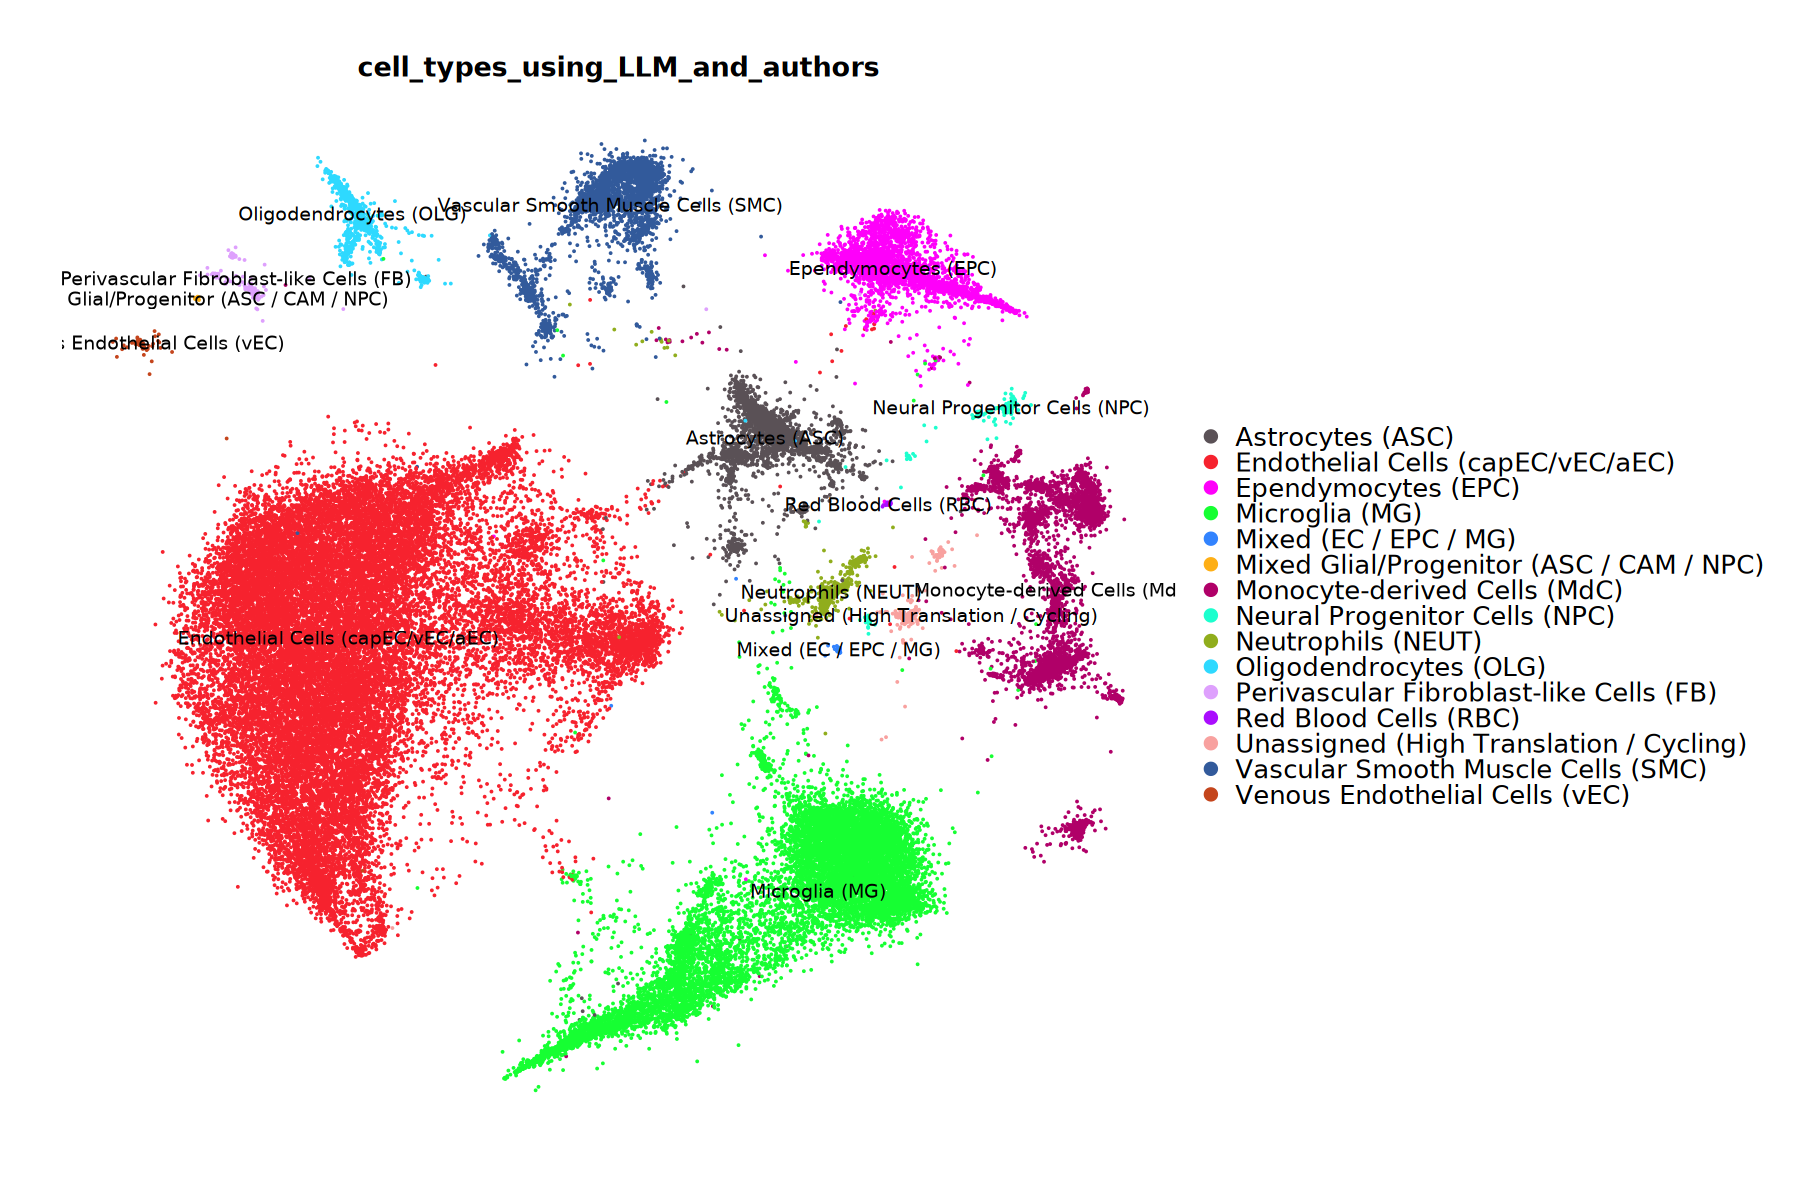

In [171]:
options(repr.plot.width = 15, repr.plot.height = 10) 

DimPlot(object = zheng_et_al_filtered, 
        shuffle = TRUE, 
        reduction = 'XscVImde_', 
        group.by = "cell_types_using_LLM_and_authors", 
        cols = my_colours, 
        label = TRUE) + my_theme + my_margin + NoAxes()

In [172]:
# Below, I briefly inspected other single cell datasets for their applicability to use as refs:

ref_sce_1 <- scRNAseq::TasicBrainData()

In [173]:
ref_sce_1$broad_type %>% table()

.
                     Astrocyte               Endothelial Cell 
                            43                             29 
             GABA-ergic Neuron           Glutamatergic Neuron 
                           761                            812 
                     Microglia                Oligodendrocyte 
                            22                             38 
Oligodendrocyte Precursor Cell                   Unclassified 
                            22                             82 

In [174]:
# next:

ref_sce_1 <- scRNAseq::UsoskinBrainData()

In [175]:
ref_sce_1$`Level 3` %>% table()

.
          >1 cell Central, unsolved        Empty well            Medium 
               33                39                17                15 
       NF outlier               NF1               NF2               NF3 
                9                31                48                12 
              NF4               NF5               NP1               NP2 
               22                26               125                32 
              NP3               NoN       NoN outlier              PEP1 
               12               109                 2                64 
             PEP2                TH        TH outlier 
               17               233                18 

In [176]:
# most single cell mouse datasets are not useful for my dataset.

In [178]:
# I can also use my other mouse stroke seurat object as reference:

# However, most cell types do not match, because they FACS sorted the cells in GBonilla et al.
# but not in Zheng et al.

# obj_dir <- 
#  '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25'

# GBonilla_seurat <-  
#     readRDS(file.path(obj_dir, 'r_objects', 'GBonilla_seurat_w_Regulons.RDS'))

# GBonilla_seurat

# ref_sce_1 <- as.SingleCellExperiment(GBonilla_seurat)

# ref_sce_1$main_cell_types %>% table()

# intersect(rownames(zheng_et_al_SCE), rownames(ref_sce_1)) %>% length()

# common_genes <- intersect(rownames(zheng_et_al_SCE), rownames(ref_sce_1))

# # args of SingleR:

#     SingleR(
#       test,
#       ref,
#       labels,
#       method = NULL,
#       clusters = NULL,
#       genes = "de",
#       sd.thresh = 1,
#       de.method = "classic",
#       de.n = NULL,
#       de.args = list(),
#       aggr.ref = FALSE,
#       aggr.args = list(),
#       recompute = TRUE,
#       restrict = NULL,
#       quantile = 0.8,
#       fine.tune = TRUE,
#       tune.thresh = 0.05,
#       prune = TRUE,
#       assay.type.test = "logcounts",
#       assay.type.ref = "logcounts",
#       check.missing = TRUE,
#       num.threads = bpnworkers(BPPARAM),
#       BNPARAM = NULL,
#       BPPARAM = SerialParam()
#     )

# pred_4 <- SingleR::SingleR(test=zheng_et_al_SCE[common_genes,], 
#                            ref=ref_sce_1[common_genes, ], 
#                            assay.type.test = "logcounts",
#                            assay.type.ref = "logcounts",
#                            labels=ref_sce_1$main_cell_types,
#                            de.method="wilcox")

Next, I will continue with DE analysis.

In [180]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] DFplyr_1.0.0       dplyr_1.1.4        pheatmap_1.0.12    ggplot2_3.5.1     
[5] magrittr_2.0.3     Seurat_5.1.0       SeuratObject_5.0.2 sp_2.1-4          

loaded via a namespace (and not attached):
  [1] ProtGenerics_1.38.0         bitops_1.0-8               
  [3] matrixStats_1